# Praktikum 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import scipy.signal
from scipy.signal import find_peaks, filtfilt, find_peaks
from Lab2Functions import decg_peaks, d_ecg_peaks, Rwave_peaks


## Aufgabe 1
Erstellen Sie ein Diagramm, in dem das kabellose Messystem dargestellt wird. Beschriften Sie dabei jede Komponente und beschrieben Sie diese kurz    

C:\Users\hausa\AppData\Local\Temp\ipykernel_18292\2860714818.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = patches.Rectangle((x - width / 2, y - height / 2), width, height, color=color, edgecolor="black", zorder=2)


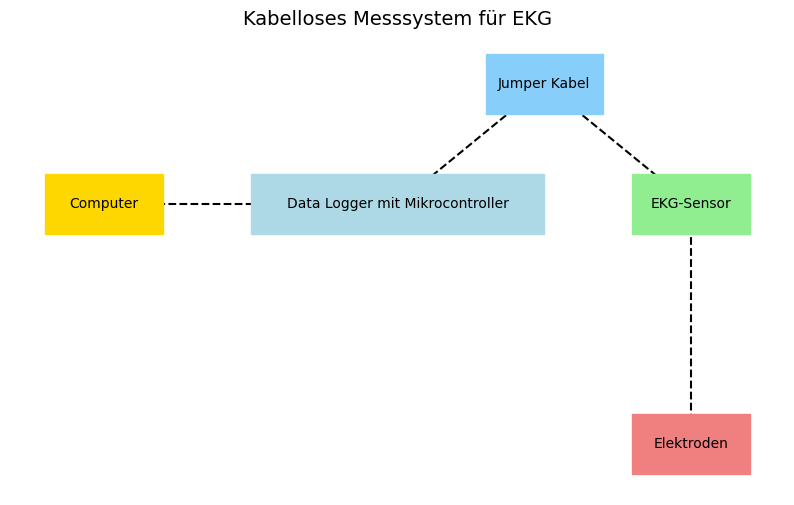

Kurzbeschreibung der Komponenten:
- Data Logger mit Mikrocontroller: Steuerung und Datenverarbeitung
- EKG-Sensor: Erfassung elektrischer Signale des Herzens
- Elektroden: Messpunkte für das EKG-Signal
- Computer: Stromversorgung für das mobile System
- Jumper Kabel: Verbindung der Komponenten


In [3]:
# Komponenten des kabellosen Messsystems
components = [
    {"name": "Data Logger mit Mikrocontroller", "desc": "Steuerung und Datenverarbeitung", "color": "lightblue"},
    {"name": "EKG-Sensor", "desc": "Erfassung elektrischer Signale des Herzens", "color": "lightgreen"},
    {"name": "Elektroden", "desc": "Messpunkte für das EKG-Signal", "color": "lightcoral"},
    {"name": "Computer", "desc": "Stromversorgung für das mobile System", "color": "gold"},
    {"name": "Jumper Kabel", "desc": "Verbindung der Komponenten", "color": "lightskyblue"},
]

# Positionen der Komponenten im Diagramm
positions = {
    "Data Logger mit Mikrocontroller": (0, 0),
    "EKG-Sensor": (2, 0),
    "Elektroden": (2, -2),
    "Computer": (-2, 0),
    "Jumper Kabel": (1, 1),
}

# Verbindungen zwischen den Komponenten
connections = [
    ("EKG-Sensor", "Elektroden"),
    ("Data Logger mit Mikrocontroller", "Computer"),
    ("EKG-Sensor", "Jumper Kabel"),
    ("Data Logger mit Mikrocontroller", "Jumper Kabel"),
]

# Diagramm erstellen
fig, ax = plt.subplots(figsize=(10, 6))

# Rechtecke für Komponenten zeichnen
default_width, height = 0.8, 0.5  # Standardbreite und Höhe der Rechtecke
for comp in components:
    name = comp["name"]
    color = comp["color"]
    x, y = positions[name]
    # Größeren Kasten für "Data Logger mit Mikrocontroller"
    if name == "Data Logger mit Mikrocontroller":
        width = 2.0  # Erhöhte Breite für diesen speziellen Kasten
    else:
        width = default_width
    rect = patches.Rectangle((x - width / 2, y - height / 2), width, height, color=color, edgecolor="black", zorder=2)
    ax.add_patch(rect)
    ax.text(x, y, name, ha="center", va="center", fontsize=10, zorder=3)

# Verbindungen einzeichnen
for comp1, comp2 in connections:
    x1, y1 = positions[comp1]
    x2, y2 = positions[comp2]
    ax.plot([x1, x2], [y1, y2], "k--", zorder=1)

# Diagramm anpassen
ax.set_title("Kabelloses Messsystem für EKG", fontsize=14)
ax.axis("off")
plt.show()

# Beschreibung der Komponenten
print("Kurzbeschreibung der Komponenten:")
for comp in components:
    print(f"- {comp['name']}: {comp['desc']}")


## Aufgabe 2
Beschreiben sie was im seriellen Plotter zu erkennen ist, wenn sie ihre Messdaten aufnehmen und der Laptop dabei nicht am Stromnetz angeschlossen ist. Was passiert wenn sie mit beiden Händen an das Metallgehäuse des  laptops greifen und der Laptop am Stromnetz angeschlossen is?

Antwort: 
- **Laptop nicht am Stromnetz:** 
  Das EKG-Signal ist im seriellen Plotter meist sauber und zeigt typische Herzsignale (P-Wellen, QRS-Komplexe, T-Wellen) ohne größere Störungen, da kein Netzfrequenz-Rauschen (50 Hz) vorliegt.

- **Laptop am Stromnetz und Berührung des Metallgehäuses:** 
  Es treten deutliche Störungen auf, verursacht durch Netzfrequenz-Artefakte. Diese entstehen durch Ableitströme, die über den Körper fließen, und überlagern das Signal.

**Ergebnis:** Batteriebetrieb liefert störungsfreiere Messdaten, während Netzbetrieb mit Berührung des Laptops Artefakte erzeugt.

## Aufgabe 3
Führen Sie Aufgabe 1 Teil 4: Experiment in Ruhe für jeden Teilnehmer Ihrer Gruppe aus und plotten Sie etwas 5 Sekunden der gefilterten Daten.
Markieren Sie für einen Teilnehmer die P-Welle, den QRS-Komplex und die T-Welle im Plot. Beschreiben Sie das physiologische Phänomen, welches für die jeweiligen elektrischen Signale des EKGs verantwortlich ist.

## Experiment in Ruhe
Plot der gefilterten Daten jedes Teilnehmers

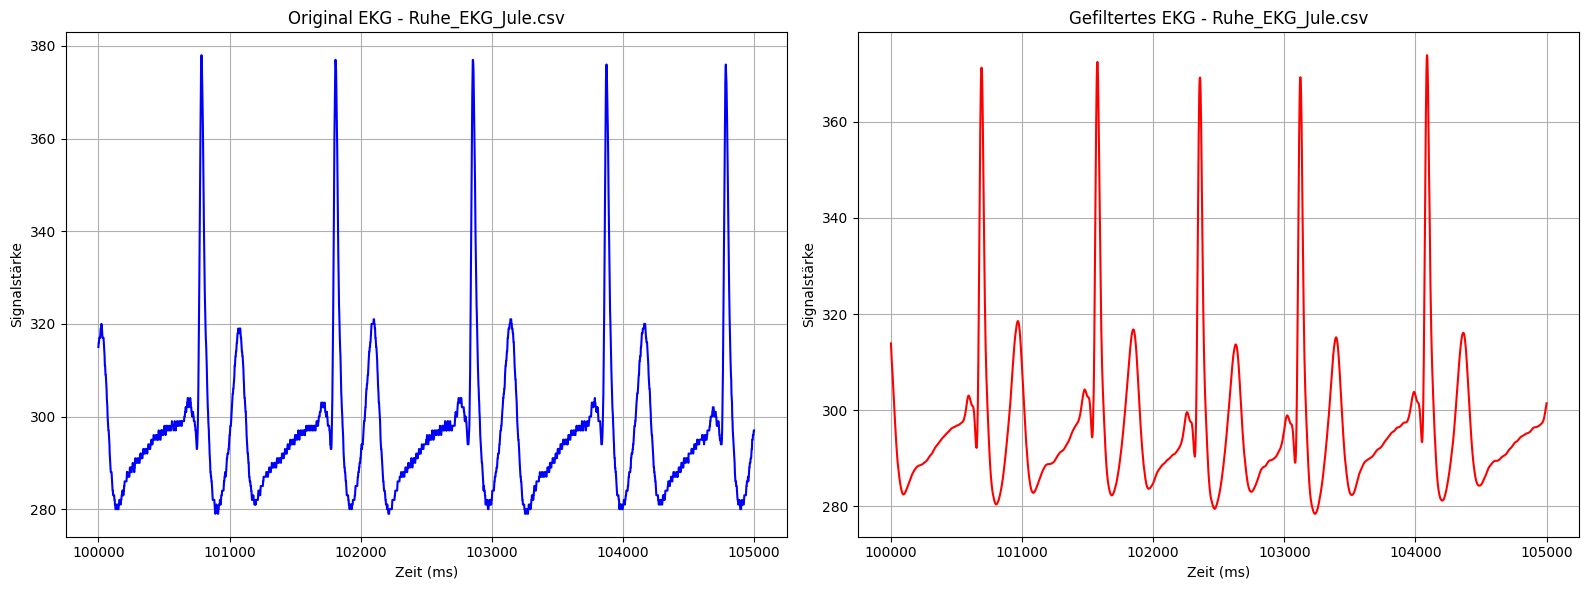

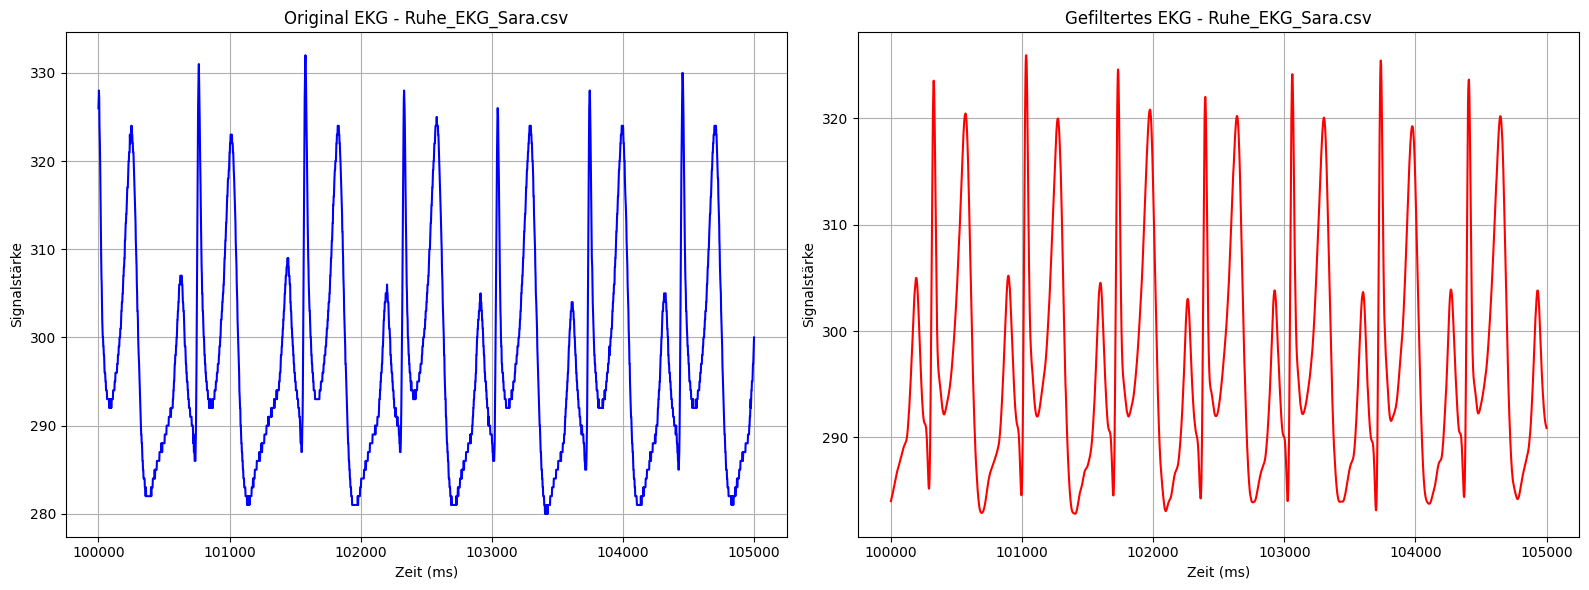

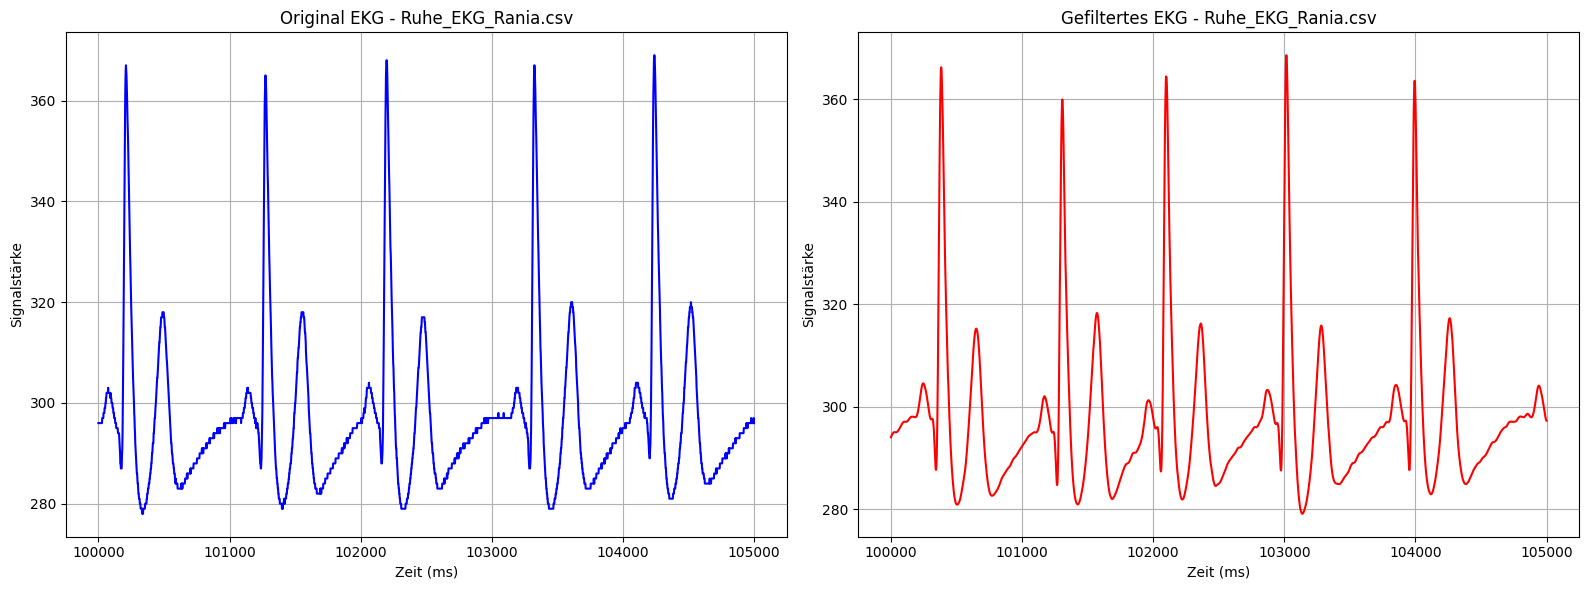

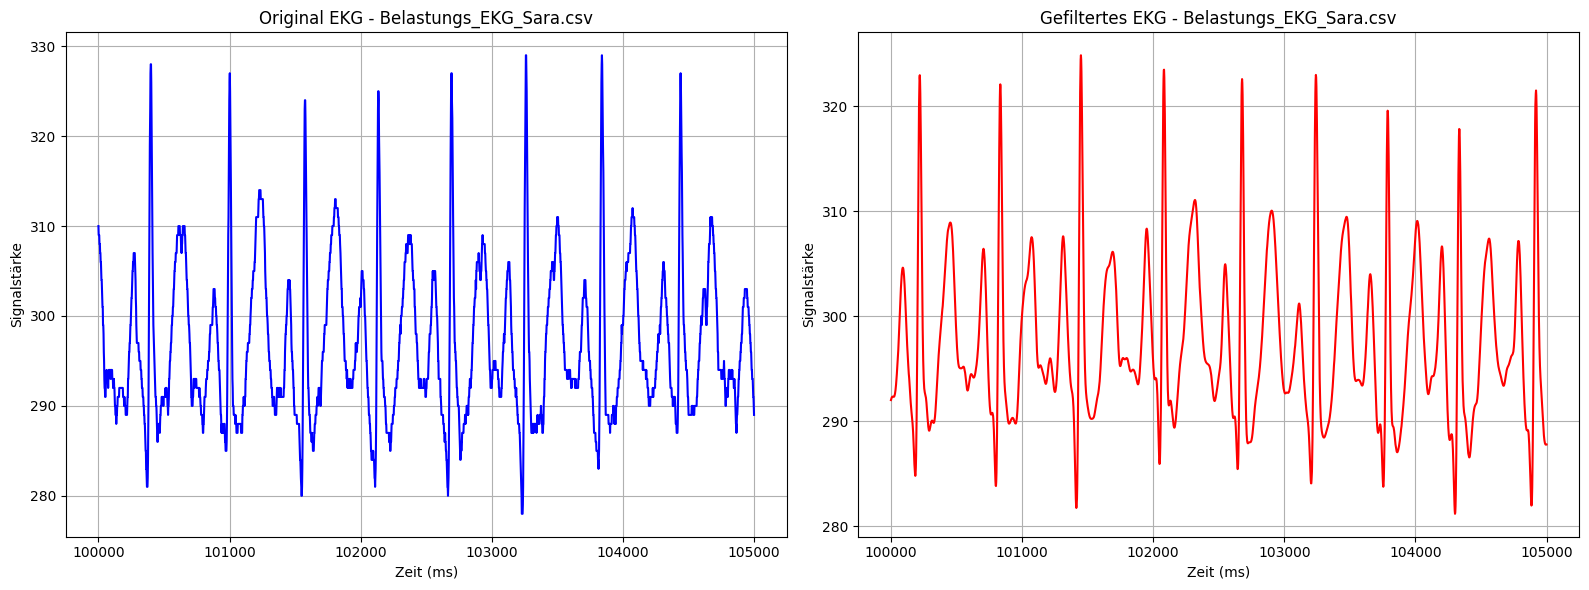

(array([100000., 100002., 100004., ..., 104996., 104998., 105000.]),
 array([292.01919605, 292.11044091, 292.19190058, ..., 287.77400832,
        287.77938858, 287.7883542 ]))

In [45]:
def plot_ekg(filename):
    """
    Liest EKG-Daten aus einer CSV-Datei ein, filtert das hochfrequente Rauschen und plottet die mittleren 5 Sekunden
    der Aufnahmen.
    
    :param filename: Pfad zur CSV-Datei mit EKG-Daten
    """
    # CSV-Datei einlesen; erste Spalte als 'Wert' und zweite Spalte als 'Zeit' benennen
    df = pd.read_csv(filename, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Überprüfe auf Zeilen mit fehlenden oder falschen Werten
    df = df.dropna()  # Entferne Zeilen mit NaN-Werten
    df = df[df['Wert'].apply(lambda x: isinstance(x, (int, float)))]  # Entferne Zeilen, bei denen 'Wert' keine Zahl ist
    df = df[df['Zeit'].apply(lambda x: isinstance(x, (int, float)))]  # Entferne Zeilen, bei denen 'Zeit' keine Zahl ist
    
    # Extrahiere das EKG-Signal und die Zeit aus dem DataFrame
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Setze Filterparameter
    Wn = 0.1  # Normalisierte Cutoff-Frequenz
    b, a = scipy.signal.butter(4, Wn, 'low', analog=False)  # Butterworth-Filter erstellen
    
    # Filtere das EKG-Signal
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
        
    # Definiere die Start- und Endzeitpunkte für die Zeitspanne 
    start_time = 100000
    end_time = 105000
    
    # Filtere die Daten für die angegebene Zeitspanne
    mid_section = df[(df['Zeit'] >= start_time) & (df['Zeit'] <= end_time)]
    
    # Sicherstellen, dass genug Daten vorhanden sind, bevor geplottet wird
    if len(mid_section) == 0:
        print(f"Keine Daten im angegebenen Zeitraum für {filename}.")
        return
    
    # Plotten der Original- und gefilterten EKG-Daten nebeneinander
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Originalsignal plotten (blau)
    axes[0].plot(mid_section['Zeit'], mid_section['Wert'], color='blue', linestyle='-')
    axes[0].set_title(f'Original EKG - {filename}')
    axes[0].set_xlabel('Zeit (ms)')
    axes[0].set_ylabel('Signalstärke')
    axes[0].grid(True)
    
    # Gefiltertes Signal plotten (rot)
    filtered_section = ecg_filtered[:len(mid_section)]
    axes[1].plot(mid_section['Zeit'], filtered_section, color='red', linestyle='-')
    axes[1].set_title(f'Gefiltertes EKG - {filename}')
    axes[1].set_xlabel('Zeit (ms)')
    axes[1].set_ylabel('Signalstärke')
    axes[1].grid(True)
    
    # Layout anpassen und anzeigen
    plt.tight_layout()
    plt.show()
    
    # Rückgabe der gefilterten Daten für die Wellenmarkierung
    return mid_section['Zeit'].values, filtered_section

# Aufruf der Funktion mit verschiedenen EKG-Daten
plot_ekg('Ruhe_EKG_Jule.csv')
plot_ekg('Ruhe_EKG_Sara.csv')
plot_ekg('Ruhe_EKG_Rania.csv')
plot_ekg('Belastungs_EKG_Sara.csv')

Markierung P-Welle, QRS-Komplex und T-Welle im Plot eines Teilnehmers.

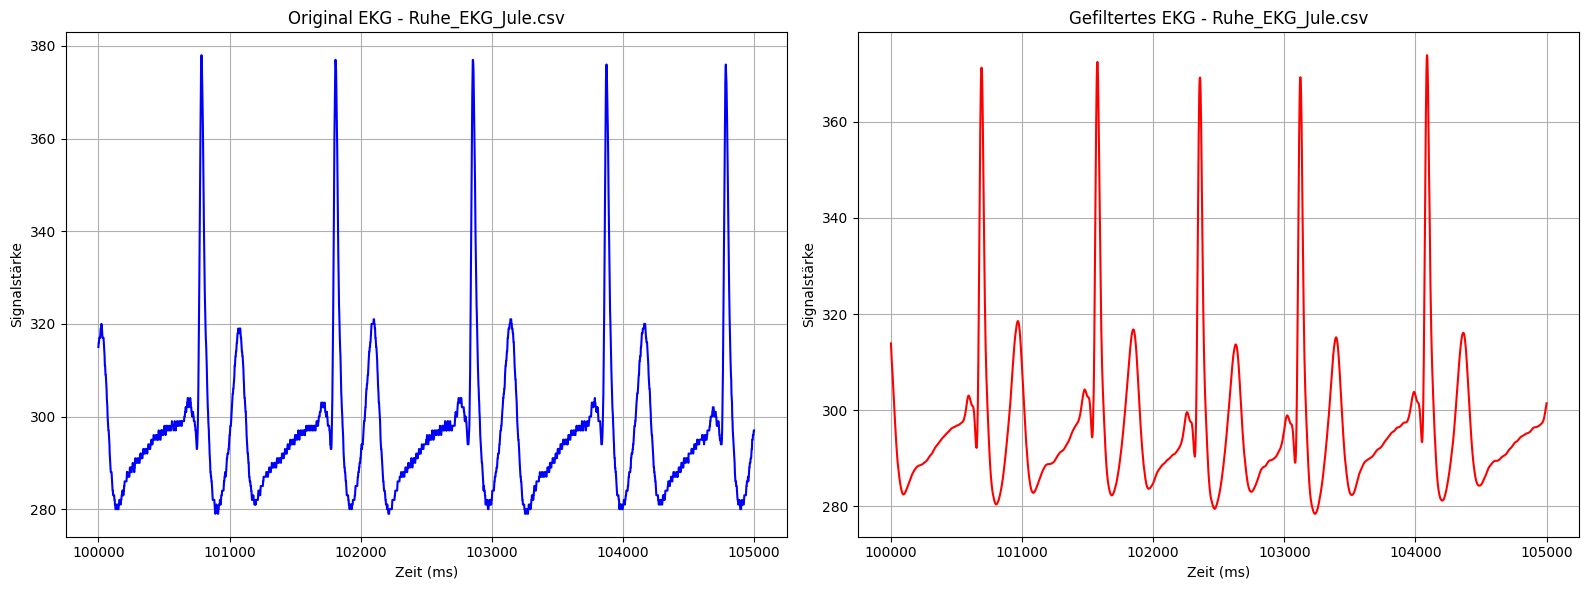

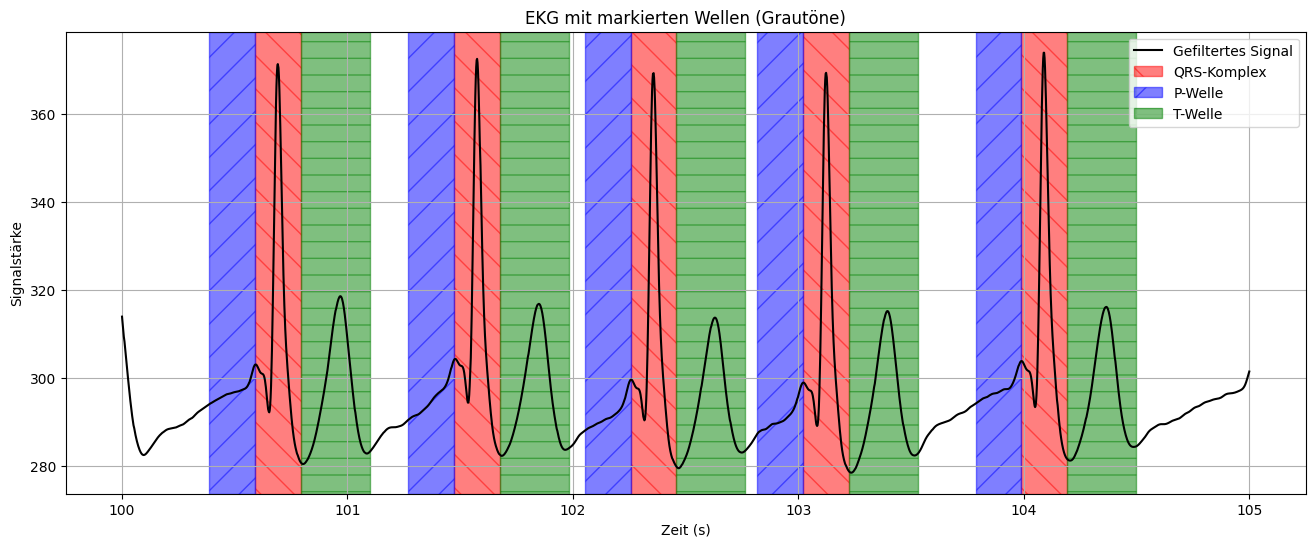

In [46]:
def mark_ekg_waves(time, signal):
    """
    Markiert die P-Welle, den QRS-Komplex und die T-Welle in einem gefilterten EKG-Plot.

    :param time: Zeitdaten des gefilterten EKG-Signals (in Millisekunden)
    :param signal: Gefiltertes EKG-Signal
    """
    # Konvertiere Zeit in Sekunden
    time = time / 1000.0

    # QRS-Komplex detektieren
    peaks, _ = scipy.signal.find_peaks(
        signal,
        distance=200,  # Abstand zwischen Peaks (angepasst an typische EKG-Werte)
        height=np.mean(signal) + 0.5 * np.std(signal)  # Höhe basierend auf Mittelwert + 0.5 * Std
    )

    # Visualisieren
    plt.figure(figsize=(16, 6))
    plt.plot(time, signal, label='Gefiltertes Signal', color='black', linewidth=1.5)

    # Markiere P-Welle, QRS-Komplex und T-Welle
    for peak in peaks:
        qrs_start = max(0, peak - 50)  # QRS-Komplex beginnt typischerweise 50 ms vor dem Peak
        qrs_end = min(len(signal), peak + 50)  # QRS-Komplex endet 50 ms nach dem Peak

        p_wave_start = max(0, peak - 150)  # P-Welle liegt typischerweise 150 ms vor dem Peak
        p_wave_end = qrs_start

        t_wave_start = qrs_end
        t_wave_end = min(len(signal), peak + 200)  # T-Welle liegt typischerweise 200 ms nach dem Peak

        # Markiere QRS-Komplex (unterschiedliche Grautöne)
        plt.axvspan(time[qrs_start], time[qrs_end], color='red', alpha=0.5, hatch='\\', label='QRS-Komplex' if peak == peaks[0] else "")

        # Markiere P-Welle (unterschiedliche Grautöne)
        plt.axvspan(time[p_wave_start], time[p_wave_end], color='blue', alpha=0.5, hatch='/', label='P-Welle' if peak == peaks[0] else "")

        # Markiere T-Welle (unterschiedliche Grautöne)
        plt.axvspan(time[t_wave_start], time[t_wave_end], color='green', alpha=0.5, hatch='-', label='T-Welle' if peak == peaks[0] else "")

    # Beschriftungen (in Sekunden)
    plt.xlabel('Zeit (s)')
    plt.ylabel('Signalstärke')
    plt.title('EKG mit markierten Wellen (Grautöne)')
    plt.legend()
    plt.grid(True)
    plt.show()

time, signal = plot_ekg('Ruhe_EKG_Jule.csv')
mark_ekg_waves(time, signal)

Welches Phänomen ist für die jeweiligen elektrischen Signale des EKGs verantwortlich

### Physiologische Phänomene der EKG-Signale:

1. **P-Welle**:
   - **Beschreibung**: Die P-Welle repräsentiert die Depolarisation der Vorhöfe (Atrien).
   - **Physiologischer Hintergrund**: Diese Phase zeigt, wie sich elektrische Impulse von der sinoatrialen (SA-) Knoten durch die Vorhöfe ausbreiten. Dieser Prozess leitet die Kontraktion der Vorhöfe ein und fördert den Blutfluss in die Ventrikel.

2. **QRS-Komplex**:
   - **Beschreibung**: Der QRS-Komplex zeigt die Depolarisation der Ventrikel (Herzkammern).
   - **Physiologischer Hintergrund**: Dies ist der wichtigste Teil des EKGs und signalisiert die elektrische Aktivität, die die Kontraktion der Herzkammern auslöst. Sie beginnt mit der Erregung der Herzspitze (Q-Welle), dem schnellen Anstieg der Erregung der Hauptmassen (R-Welle) und endet mit der Depolarisation der Basis der Ventrikel (S-Welle).

3. **T-Welle**:
   - **Beschreibung**: Die T-Welle repräsentiert die Repolarisation der Ventrikel.
   - **Physiologischer Hintergrund**: Nach der Kontraktion kehren die Ventrikel in ihren Ruhezustand zurück, wobei die Ladungsverhältnisse in den Zellen wiederhergestellt werden. Diese Phase ist entscheidend für die Vorbereitung der nächsten Depolarisation.

---

**Zusammenhang**:
Diese Signale sind Ausdruck der elektrischen Erregung und Erholung des Herzens. Sie korrelieren direkt mit der mechanischen Funktion des Herzens: Vorhofkontraktion, Ventrikelkontraktion und -entspannung, die für die Aufrechterhaltung des Blutflusses im Kreislaufsystem unerlässlich sind.

## Aufgabe 4
Geben Sie den Code an, welcher für die Aufnahme der Rohdaten des EKG-Signals verantwortlich ist.


/*
 * Dieser Code ermöglicht die Aufnahme von analogen Daten mit einer Abtastfrequenz von 500 Hz
 */

#define sf 500 //für eine andere Abtastrate ändern
int tc (1000/(sf));     // Zeitkonstante

unsigned int ADC_Value = 0;    //derzeitiger ADC Wert
unsigned long last_time = 0;
void setup() {
  Serial.begin(500000);
}


// die loop() Routine läuft, solange der Microcontroller mit Spannung versorgt ist
void loop() {

  if (millis() - last_time >= tc) {  //sobald 2ms vergangen sind, wird der analoge Wert gespeichert - bei 1000Hz jede 1ms
    last_time = millis();
    ADC_Value = analogRead(A0);
    
    Serial.print(ADC_Value);
    Serial.print('\t');
    Serial.print(millis());
    Serial.println();
    }
}

## Aufgabe 5
Plotten Sie etwas 5 Sekunden des EKG Signals vom Experiment in Ruhe von einem Teilnehmen (gefiltert). Nutzen Sie die Ergebnisse der Peak-Suche_Funktion, um die R-Zacken im Plot zu label

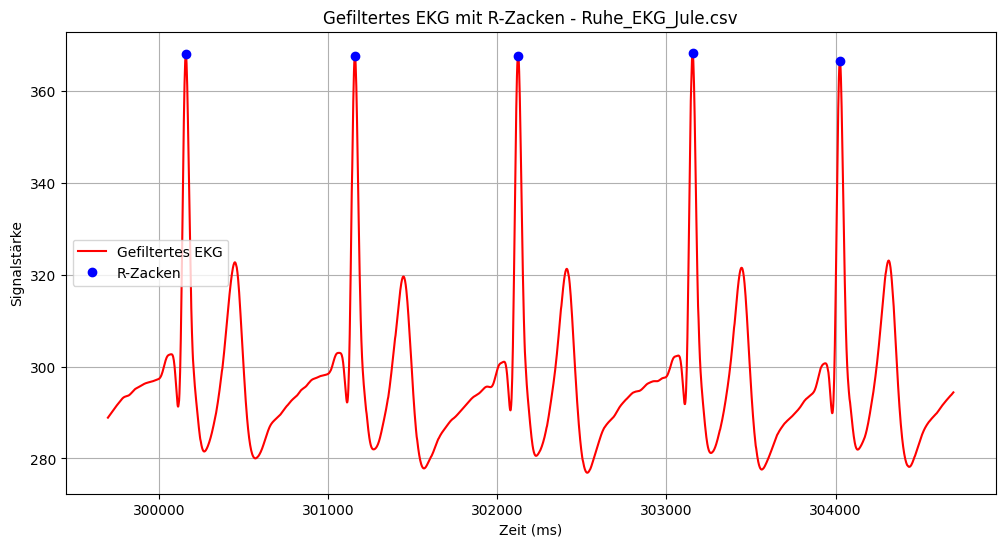

In [53]:
# Funktion zur Darstellung des EKG-Signals mit markierten R-Zacken

def plot_ekg_with_peaks(Ruhe_EKG_Jule):
    """
    Liest EKG-Daten aus einer CSV-Datei, filtert hochfrequentes Rauschen, 
    und plottet die mittleren 5 Sekunden der Aufnahme mit markierten R-Zacken.
    
    :param filename: Pfad zur CSV-Datei mit EKG-Daten
    """
    # CSV-Datei einlesen
    df = pd.read_csv(Ruhe_EKG_Jule, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Daten bereinigen
    df = df.dropna()
    df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
    df['Zeit'] = pd.to_numeric(df['Zeit'], errors='coerce')
    df = df.dropna()

    # Extrahiere das EKG-Signal und die Zeit
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Butterworth-Filter anwenden
    Wn = 0.075  # Normalisierte Cutoff-Frequenz --> Frequnez von 1 auf 0.075 geändert
    b, a = scipy.signal.butter(4, Wn, 'low', analog=False)
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
    
    # Zeitraum für die mittleren 5 Sekunden
    start_time = time[0] + (time[-1] - time[0]) / 2 - 2500
    end_time = start_time + 5000
    mid_section = df[(df['Zeit'] >= start_time) & (df['Zeit'] <= end_time)]
    
    if len(mid_section) == 0:
        print(f"Keine Daten im angegebenen Zeitraum für {Ruhe_EKG_Jule}.")
        return
    
    # Gefiltertes Signal für den Zeitraum
    filtered_section = ecg_filtered[(time >= start_time) & (time <= end_time)]
    section_time = time[(time >= start_time) & (time <= end_time)]

    # Find Peaks Funktion zur Markierung der R-Zacken
    peaks, _ = scipy.signal.find_peaks(filtered_section, height=0.5, distance=150)

    # Plotten der gefilterten EKG-Daten mit markierten R-Zacken
    plt.figure(figsize=(12, 6))
    plt.plot(section_time, filtered_section, color='red', label='Gefiltertes EKG')
    plt.plot(section_time[peaks], filtered_section[peaks], 'bo', label='R-Zacken')
    plt.title(f'Gefiltertes EKG mit R-Zacken - {Ruhe_EKG_Jule}')
    plt.xlabel('Zeit (ms)')
    plt.ylabel('Signalstärke')
    plt.legend()
    plt.grid(True)
    plt.show()

# Funktion aufrufen für die Daten von Jule
plot_ekg_with_peaks('Ruhe_EKG_Jule.csv')


## Aufgabe 6
Verwenden Sie Python, um die mittlere Herzfrequenz und HRV (mit derStandardabweichung) für jeden der drei Teilnehmer zu bestimmen. Vergleichen Sie die Ergebnisse in einer Tabelle (eine Zeile pro Teilnehmer). Denken Sie daran, alle Datensätze zu den jeweiligen Teilnehmern mit abzugeben.
 Die Berechnung soll im Code MainCode2 stattfinden.


Verarbeite Daten für Jule...


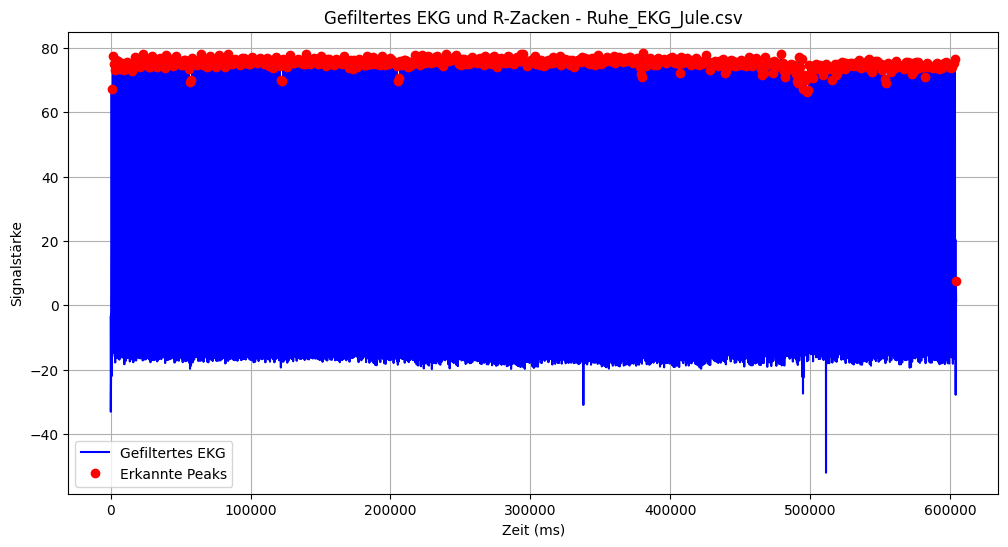


Verarbeite Daten für Rania...


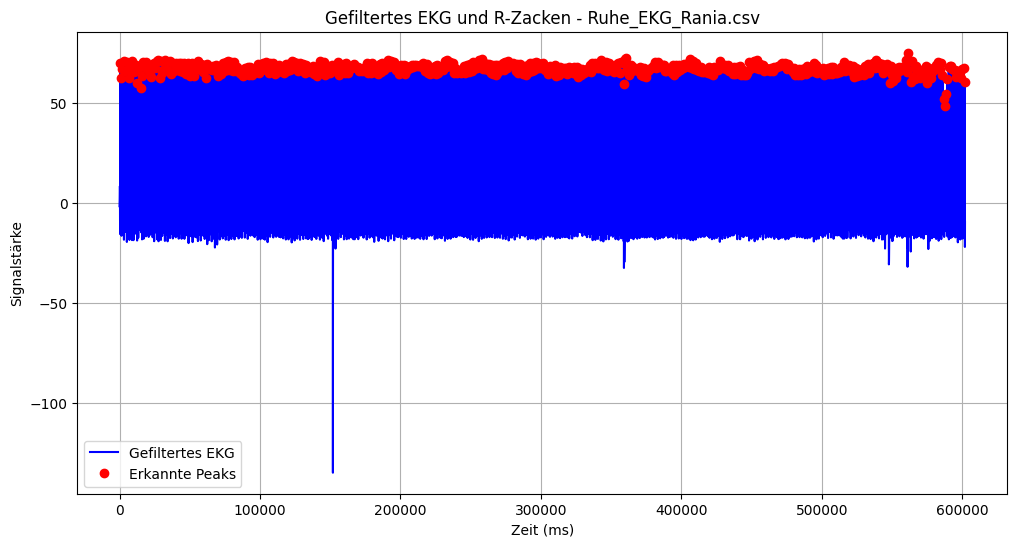


Verarbeite Daten für Sara...


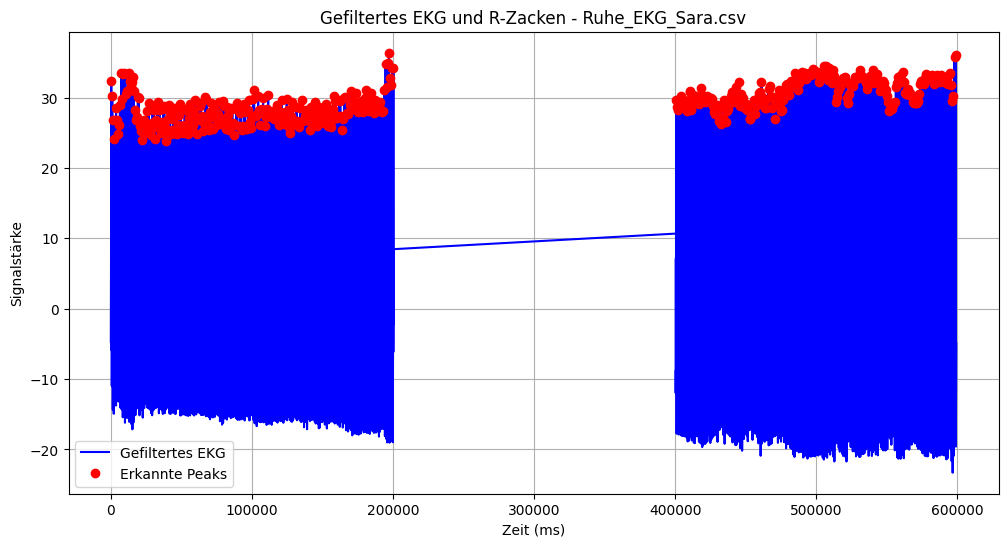


Ergebnisse:
    Name  Avg Heart Rate (BPM)     HRV (ms)
0   Jule             63.725084    89.673241
1  Rania             63.055603   115.869545
2   Sara             52.231362  9191.174196

Vergleich der Ergebnisse:
- Jule hat eine mittlere Herzfrequenz von 63.73 BPM und eine HRV von 89.67 ms.
- Rania hat eine mittlere Herzfrequenz von 63.06 BPM und eine HRV von 115.87 ms.
- Sara hat eine mittlere Herzfrequenz von 52.23 BPM und eine HRV von 9191.17 ms.

Zusammenfassung:
Die Visualisierung hilft, Artefakte zu identifizieren. Passen Sie bei Bedarf die Filter- oder Peak-Parameter an.


In [54]:
def calculate_hr_and_hrv_with_visualization(filename):
    """
    Berechnet die mittlere Herzfrequenz und die Herzfrequenzvariabilität (HRV)
    aus einer CSV-Datei mit EKG-Daten und visualisiert die erkannten Peaks.
    
    :param filename: Pfad zur CSV-Datei mit EKG-Daten
    :return: Durchschnittliche Herzfrequenz (BPM) und HRV (Standardabweichung)
    """
    # CSV-Datei einlesen
    df = pd.read_csv(filename, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Daten bereinigen
    df = df.dropna()
    df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
    df['Zeit'] = pd.to_numeric(df['Zeit'], errors='coerce')
    df = df.dropna()
    
    # Extrahiere das EKG-Signal und die Zeit
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Bandpassfilter (0.5–50 Hz) anwenden
    fs = 1000  # Abtastrate in Hz (anpassen, falls abweichend)
    lowcut = 0.5 / (fs / 2)
    highcut = 50 / (fs / 2)
    b, a = scipy.signal.butter(4, [lowcut, highcut], btype='band')
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
    
    # Find Peaks zur Bestimmung der R-Zacken (Threshold angepasst)
    peaks, _ = scipy.signal.find_peaks(ecg_filtered, height=1.0, distance=300)
    
    # Plot des Signals und der erkannten Peaks
    plt.figure(figsize=(12, 6))
    plt.plot(time, ecg_filtered, label="Gefiltertes EKG", color='blue')
    plt.plot(time[peaks], ecg_filtered[peaks], 'ro', label="Erkannte Peaks")
    plt.title(f"Gefiltertes EKG und R-Zacken - {filename}")
    plt.xlabel("Zeit (ms)")
    plt.ylabel("Signalstärke")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Berechnung der RR-Intervalle (Abstände zwischen Peaks in ms)
    rr_intervals = np.diff(time[peaks])  # Zeitdifferenzen zwischen Peaks
    
    # Herzfrequenz (BPM) berechnen: 60.000 ms / durchschnittliches RR-Intervall
    avg_heart_rate = 60000 / np.mean(rr_intervals) if len(rr_intervals) > 0 else 0
    
    # Herzfrequenzvariabilität (Standardabweichung der RR-Intervalle)
    hrv = np.std(rr_intervals) if len(rr_intervals) > 0 else 0
    
    return avg_heart_rate, hrv

# Daten für jeden Teilnehmer berechnen und visualisieren
participants = {
    "Jule": "Ruhe_EKG_Jule.csv",
    "Rania": "Ruhe_EKG_Rania.csv",
    "Sara": "Ruhe_EKG_Sara.csv"
}

results = []
for name, file in participants.items():
    print(f"\nVerarbeite Daten für {name}...")
    avg_hr, hrv = calculate_hr_and_hrv_with_visualization(file)
    results.append({"Name": name, "Avg Heart Rate (BPM)": avg_hr, "HRV (ms)": hrv})

# Ergebnisse als Tabelle darstellen
results_df = pd.DataFrame(results)

# Tabelle drucken
print("\nErgebnisse:")
print(results_df)

# Vergleich der Ergebnisse
print("\nVergleich der Ergebnisse:")
for index, row in results_df.iterrows():
    print(f"- {row['Name']} hat eine mittlere Herzfrequenz von {row['Avg Heart Rate (BPM)']:.2f} BPM "
          f"und eine HRV von {row['HRV (ms)']:.2f} ms.")

# Zusammenfassung
print("\nZusammenfassung:")
print("Die Visualisierung hilft, Artefakte zu identifizieren. Passen Sie bei Bedarf die Filter- oder Peak-Parameter an.")


Achtung!!!
Die Ergebnisse von Sara machen so kein Sinn. Desswegen müssen die im Folgenden noch mal überarbeitet werden.

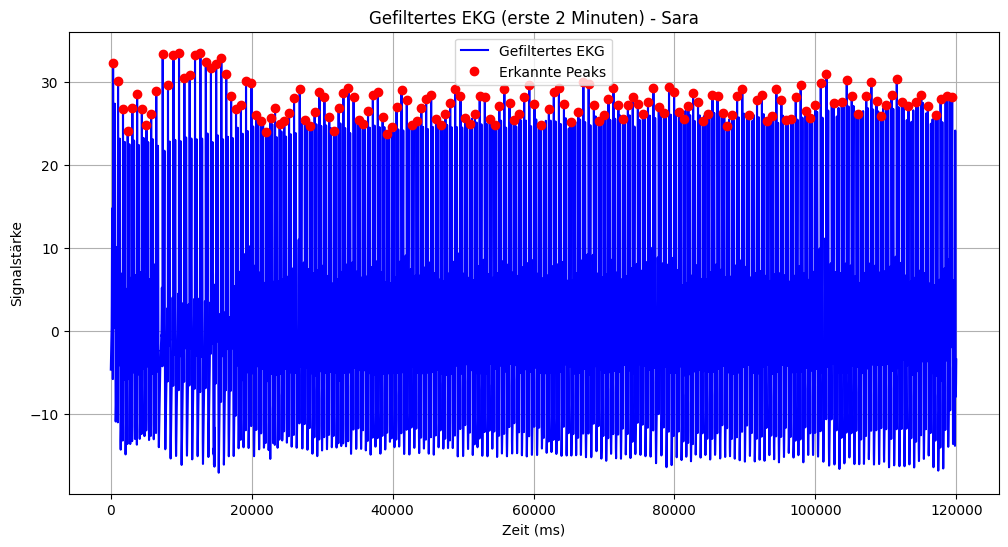

Mittlere Herzfrequenz (BPM): 81.62
Herzfrequenzvariabilität (HRV, ms): 104.16


In [55]:
# code für Heart Rate Variability (HRV) Analyse für Ruhe-EKG-Daten von Sara 

def calculate_hr_and_hrv_for_sara(filename, duration=120000):
    """
    Berechnet die mittlere Herzfrequenz und die HRV für die ersten 2 Minuten der Messung.
    
    :param filename: Pfad zur CSV-Datei mit EKG-Daten
    :param duration: Zeitdauer (in ms), die berücksichtigt werden soll (Standard: 2 Minuten = 120000 ms)
    :return: Durchschnittliche Herzfrequenz (BPM), HRV (Standardabweichung), und ein Plot des Signals
    """
    # CSV-Datei einlesen
    df = pd.read_csv(filename, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Daten bereinigen
    df = df.dropna()
    df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
    df['Zeit'] = pd.to_numeric(df['Zeit'], errors='coerce')
    df = df.dropna()
    
    # Beschränke auf die ersten 2 Minuten der Messung
    df = df[df['Zeit'] <= duration]
    
    # Extrahiere das EKG-Signal und die Zeit
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Bandpassfilter (0.5–50 Hz) anwenden
    fs = 1000  # Abtastrate in Hz (anpassen, falls abweichend)
    lowcut = 0.5 / (fs / 2)
    highcut = 50 / (fs / 2)
    b, a = scipy.signal.butter(4, [lowcut, highcut], btype='band')
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
    
    # Find Peaks zur Bestimmung der R-Zacken (Threshold angepasst)
    peaks, _ = scipy.signal.find_peaks(ecg_filtered, height=1.0, distance=300)
    
    # Berechnung der RR-Intervalle (Abstände zwischen Peaks in ms)
    rr_intervals = np.diff(time[peaks])  # Zeitdifferenzen zwischen Peaks
    
    # Herzfrequenz (BPM) berechnen: 60.000 ms / durchschnittliches RR-Intervall
    avg_heart_rate = 60000 / np.mean(rr_intervals) if len(rr_intervals) > 0 else 0
    
    # Herzfrequenzvariabilität (Standardabweichung der RR-Intervalle)
    hrv = np.std(rr_intervals) if len(rr_intervals) > 0 else 0
    
    # Plot des gefilterten Signals mit R-Zacken
    plt.figure(figsize=(12, 6))
    plt.plot(time, ecg_filtered, label="Gefiltertes EKG", color='blue')
    plt.plot(time[peaks], ecg_filtered[peaks], 'ro', label="Erkannte Peaks")
    plt.title(f"Gefiltertes EKG (erste 2 Minuten) - Sara")
    plt.xlabel("Zeit (ms)")
    plt.ylabel("Signalstärke")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return avg_heart_rate, hrv

# Berechnung und Plot für Sara
sara_file = "Ruhe_EKG_Sara.csv"  # Pfad zur Datei
sara_avg_hr, sara_hrv = calculate_hr_and_hrv_for_sara(sara_file)

# Ergebnisse ausgeben
print(f"Mittlere Herzfrequenz (BPM): {sara_avg_hr:.2f}")
print(f"Herzfrequenzvariabilität (HRV, ms): {sara_hrv:.2f}")


Vergleich der Werte

In [56]:

def calculate_hr_and_hrv(filename, duration=None):
    """
    Berechnet die mittlere Herzfrequenz und die HRV aus einer CSV-Datei mit EKG-Daten.
    
    :param filename: Pfad zur CSV-Datei mit EKG-Daten
    :param duration: Maximale Zeitdauer (in ms), die berücksichtigt werden soll (optional)
    :return: Durchschnittliche Herzfrequenz (BPM), HRV (Standardabweichung)
    """
    # CSV-Datei einlesen
    df = pd.read_csv(filename, sep=';', header=None, names=['Wert', 'Zeit'], on_bad_lines='skip')
    
    # Daten bereinigen
    df = df.dropna()
    df['Wert'] = pd.to_numeric(df['Wert'], errors='coerce')
    df['Zeit'] = pd.to_numeric(df['Zeit'], errors='coerce')
    df = df.dropna()
    
    # Beschränke auf die angegebene Zeitdauer
    if duration is not None:
        df = df[df['Zeit'] <= duration]
    
    # Extrahiere das EKG-Signal und die Zeit
    ecg_signal = df['Wert'].values
    time = df['Zeit'].values
    
    # Bandpassfilter (0.5–50 Hz) anwenden
    fs = 1000  # Abtastrate in Hz (anpassen, falls abweichend)
    lowcut = 0.5 / (fs / 2)
    highcut = 50 / (fs / 2)
    b, a = scipy.signal.butter(4, [lowcut, highcut], btype='band')
    ecg_filtered = scipy.signal.filtfilt(b, a, ecg_signal)
    
    # Find Peaks zur Bestimmung der R-Zacken
    peaks, _ = scipy.signal.find_peaks(ecg_filtered, height=1.0, distance=300)
    
    # Berechnung der RR-Intervalle (Abstände zwischen Peaks in ms)
    rr_intervals = np.diff(time[peaks])  # Zeitdifferenzen zwischen Peaks
    
    # Herzfrequenz (BPM) berechnen: 60.000 ms / durchschnittliches RR-Intervall
    avg_heart_rate = 60000 / np.mean(rr_intervals) if len(rr_intervals) > 0 else 0
    
    # Herzfrequenzvariabilität (Standardabweichung der RR-Intervalle)
    hrv = np.std(rr_intervals) if len(rr_intervals) > 0 else 0
    
    return avg_heart_rate, hrv

# Berechnungen für alle drei Teilnehmer
participants = {
    "Jule": "Ruhe_EKG_Jule.csv",
    "Rania": "Ruhe_EKG_Rania.csv",
    "Sara": "Ruhe_EKG_Sara.csv"
}

results = []
for name, file in participants.items():
    avg_hr, hrv = calculate_hr_and_hrv(file, duration=120000 if name == "Sara" else None)
    results.append({"Name": name, "Mittlere Herzfrequenz (BPM)": avg_hr, "HRV (ms)": hrv})

# Ergebnisse als Tabelle darstellen
results_df = pd.DataFrame(results)

# Tabelle anzeigen
print("\nErgebnisse:")
print(results_df)

# Vergleich der Ergebnisse ausgeben
print("\nVergleich der Ergebnisse:")
for index, row in results_df.iterrows():
    print(f"- {row['Name']} hat eine mittlere Herzfrequenz von {row['Mittlere Herzfrequenz (BPM)']:.2f} BPM "
          f"und eine HRV von {row['HRV (ms)']:.2f} ms.")

# Zusammenfassung
print("\nZusammenfassung:")
print("Die Ergebnisse zeigen die individuellen Unterschiede in Herzfrequenz und HRV. "
      "Sara's Werte basieren nur auf den ersten 2 Minuten der Messung, während die anderen über die gesamte Messung analysiert wurden.")



Ergebnisse:
    Name  Mittlere Herzfrequenz (BPM)    HRV (ms)
0   Jule                    63.725084   89.673241
1  Rania                    63.055603  115.869545
2   Sara                    81.619629  104.156778

Vergleich der Ergebnisse:
- Jule hat eine mittlere Herzfrequenz von 63.73 BPM und eine HRV von 89.67 ms.
- Rania hat eine mittlere Herzfrequenz von 63.06 BPM und eine HRV von 115.87 ms.
- Sara hat eine mittlere Herzfrequenz von 81.62 BPM und eine HRV von 104.16 ms.

Zusammenfassung:
Die Ergebnisse zeigen die individuellen Unterschiede in Herzfrequenz und HRV. Sara's Werte basieren nur auf den ersten 2 Minuten der Messung, während die anderen über die gesamte Messung analysiert wurden.


## Aufgabe 7
Kann man erst machen, wenn die ganze Klasse die Daten eingetragen hat

7a.

Code um die Einheit rauszulöschen und Komma durch Punkt zu ersetzten:

In [10]:
# Laden der CSV-Datei
df = pd.read_csv('HeartRateData.csv')

# Überprüfen der Struktur der Daten (ersten paar Zeilen des DataFrames)
print(df.head())

# Bereinigen der Spalten, indem die Einheiten entfernt werden und das Komma durch einen Punkt ersetzt wird
df['mittlere Herzfrequenz'] = df['mittlere Herzfrequenz'].str.replace(' bpm', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Herzfrequenzvariabilität'] = df['Herzfrequenzvariabilität'].str.replace(' ms', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# Überprüfen, ob die Bereinigung erfolgreich war
print(df.head())

# Speichern der bereinigten Datei in einer neuen CSV-Datei
df.to_csv('HeartRateData_cleaned.csv', index=False)

              Name (Gruppe) mittlere Herzfrequenz Herzfrequenzvariabilität  \
0  Felicitas Thierbach (F2)             66,02 bpm                55,15 ms    
1       Lenard Zaschke (F2)             69,35 bpm                 62,16 ms   
2          Svenja Taft (F2)             74,61 bpm                 41,43 ms   
3  Tobias Wannenmacher (C2)             74.88 bpm                 64.41 ms   
4      Kathrin Gutmann (F1)             62.61 bpm                123.59 ms   

  Geschlecht (m/w)  
0                w  
1                m  
2                w  
3                m  
4                w  
              Name (Gruppe)  mittlere Herzfrequenz  Herzfrequenzvariabilität  \
0  Felicitas Thierbach (F2)                  66.02                     55.15   
1       Lenard Zaschke (F2)                  69.35                     62.16   
2          Svenja Taft (F2)                  74.61                     41.43   
3  Tobias Wannenmacher (C2)                  74.88                     64.41   
4    

Code für die Histogramme:

              Name (Gruppe)  mittlere Herzfrequenz  Herzfrequenzvariabilität  \
0  Felicitas Thierbach (F2)                  66.02                     55.15   
1       Lenard Zaschke (F2)                  69.35                     62.16   
2          Svenja Taft (F2)                  74.61                     41.43   
3  Tobias Wannenmacher (C2)                  74.88                     64.41   
4      Kathrin Gutmann (F1)                  62.61                    123.59   

  Geschlecht (m/w)  
0                w  
1                m  
2                w  
3                m  
4                w  


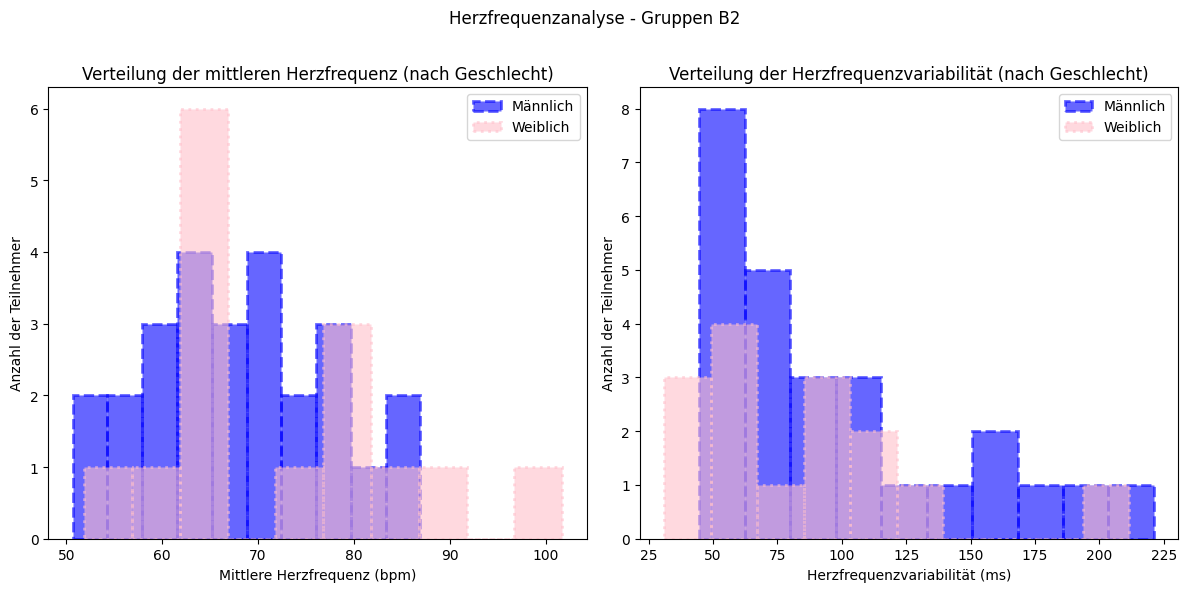

In [11]:
# Laden der CSV-Datei
df = pd.read_csv('HeartRateData_cleaned.csv')

# Überprüfen der Struktur der Daten (die Spalten und die ersten paar Zeilen)
print(df.head())

# Erstellen von zwei Histogrammen, eines für die mittlere Herzfrequenz und eines für die Variabilität
plt.figure(figsize=(12, 6))

# Histogramm für die mittlere Herzfrequenz
plt.subplot(1, 2, 1)
df_male = df[df['Geschlecht (m/w)'] == 'm']
df_female = df[df['Geschlecht (m/w)'] == 'w']

plt.hist(df_male['mittlere Herzfrequenz'], bins=10, alpha=0.6, color='blue', edgecolor='blue', linestyle='--', linewidth=2, label='Männlich')
plt.hist(df_female['mittlere Herzfrequenz'], bins=10, alpha=0.6, color='pink',edgecolor='pink', linestyle=':', linewidth=2, label='Weiblich')
plt.title('Verteilung der mittleren Herzfrequenz (nach Geschlecht)')
plt.xlabel('Mittlere Herzfrequenz (bpm)')
plt.ylabel('Anzahl der Teilnehmer')
plt.legend()

# Histogramm für die Herzfrequenzvariabilität
plt.subplot(1, 2, 2)
plt.hist(df_male['Herzfrequenzvariabilität'], bins=10, alpha=0.6, color='blue', edgecolor='blue', linestyle='--', linewidth=2, label='Männlich')
plt.hist(df_female['Herzfrequenzvariabilität'], bins=10, alpha=0.6, color='pink', edgecolor='pink', linestyle=':', linewidth=2, label='Weiblich')
plt.title('Verteilung der Herzfrequenzvariabilität (nach Geschlecht)')
plt.xlabel('Herzfrequenzvariabilität (ms)')
plt.ylabel('Anzahl der Teilnehmer')
plt.legend()

# Hinzufügen des Gruppennamen zur Beschriftung
plt.suptitle('Herzfrequenzanalyse - Gruppen B2')

# Anzeigen des Plots
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Platz für den Titel
plt.show()

### Beobachtungen:
#### Verteilung der mittleren Herzfrequenz (bpm):

Männliche Teilnehmer: Es scheint, dass die Verteilung der mittleren Herzfrequenz bei den männlichen Teilnehmern einen eher höheren Wert zeigt, mit einer stärkeren Häufung im Bereich von 60-80 bpm. Eine Häufung ist vor allem bei ungefähr 70 bpm zu sehen.

Weibliche Teilnehmer: Die Verteilung der Herzfrequenz bei den weiblichen Teilnehmern weist eine höhere Konzentration im Bereich von 60-70 bpm auf. Es gibt jedoch auch einige Ausreißer mit höheren Werten. Eine Häufung ist vor allem bei ungefähr 65 bpm zu sehen.

Mögliche Beobachtung: Im Allgemeinen zeigen männliche Teilnehmer im Durchschnitt höhere mittlere Herzfrequenzen als weibliche. Dies könnte durch biologische Unterschiede in der Herzfrequenz zwischen den Geschlechtern beeinflusst sein.

#### Verteilung der Herzfrequenzvariabilität (ms):

Männliche Teilnehmer: Die Herzfrequenzvariabilität der männlichen Teilnehmer scheint im Bereich von 50 ms bis 100 ms konzentriert zu sein, mit einigen Ausreißern auf der höheren Seite.

Weibliche Teilnehmer: Die weiblichen Teilnehmer zeigen eine breitere Verteilung der Herzfrequenzvariabilität im Bereich von 45 ms bis 125 ms, mit einigen Teilnehmern, deren Werte bis zu 200 ms reichen.

Mögliche Beobachtung: Die weiblichen Teilnehmer könnten eine größere Variation in der Herzfrequenzvariabilität aufweisen. Dies könnte auf unterschiedliche physiologische Faktoren zurückzuführen sein.

Aufgabe 8: Lassen Sie einen Ihrer Gruppenteilnehmer das Experiment in Bewegung machen, welches in aufgabe 1 Teil 5 beschrieben ist. Stellen SIe die gefilterte Herzfrequenz über die gesamte Zeit dar.

7b.

Code für den Vergleich:

Vergleich der mittlere Herzfrequenz mit der Klasse:
- Durchschnitt der Klasse: 69.46
- Standardabweichung der Klasse: 11.25
- Jule: 63.73 (unter dem Klassendurchschnitt)
- Rania: 63.06 (unter dem Klassendurchschnitt)
- Sara: 81.62 (über dem Klassendurchschnitt)


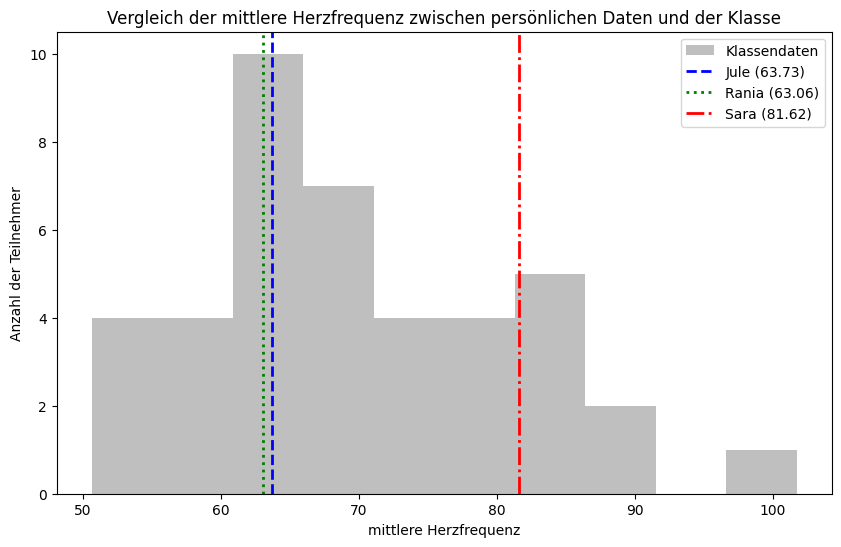

Vergleich der Herzfrequenzvariabilität mit der Klasse:
- Durchschnitt der Klasse: 90.54
- Standardabweichung der Klasse: 47.60
- Jule: 89.67 (unter dem Klassendurchschnitt)
- Rania: 115.87 (über dem Klassendurchschnitt)
- Sara: 104.16 (über dem Klassendurchschnitt)


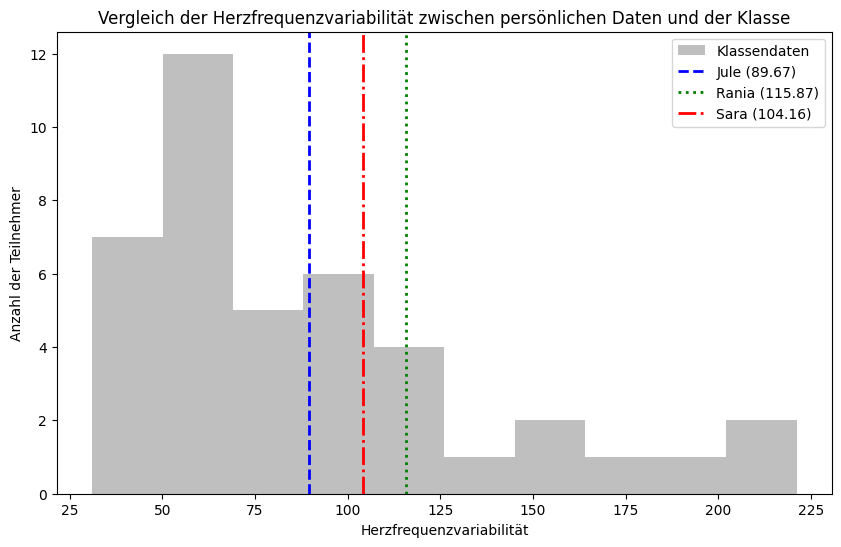

In [12]:
# unsere Ergebnisse (automatisch berechnet aus den vorherigen Daten)
participants = {
    "Jule": "Ruhe_EKG_Jule.csv",
    "Rania": "Ruhe_EKG_Rania.csv",
    "Sara": "Ruhe_EKG_Sara.csv"
}

results = []
for name, file in participants.items():
    avg_hr, hrv = calculate_hr_and_hrv(file, duration=120000 if name == "Sara" else None)
    results.append({"Name": name, "mittlere Herzfrequenz": avg_hr, "Herzfrequenzvariabilität": hrv})

# Ergebnisse in ein DataFrame umwandeln
personal_results_df = pd.DataFrame(results)

# Einlesen der Klassendaten
class_data = pd.read_csv("HeartRateData_cleaned.csv")

# Berechnung der Durchschnittswerte der Klasse
class_avg_heart_rate = class_data['mittlere Herzfrequenz'].mean()
class_avg_hrv = class_data['Herzfrequenzvariabilität'].mean()

# Berechnung der Standardabweichung der Klasse
class_std_heart_rate = class_data['mittlere Herzfrequenz'].std()
class_std_hrv = class_data['Herzfrequenzvariabilität'].std()

# Vergleich der persönlichen Daten mit den Klassendurchschnittswerten
def compare_with_class(personal_data_df, class_avg, class_std, parameter_name):
    print(f"Vergleich der {parameter_name} mit der Klasse:")
    print(f"- Durchschnitt der Klasse: {class_avg:.2f}")
    print(f"- Standardabweichung der Klasse: {class_std:.2f}")
    
    # Durchlaufe alle Teilnehmer und vergleiche ihre Werte
    for index, row in personal_data_df.iterrows():
        personal_value = row[parameter_name]
        print(f"- {row['Name']}: {personal_value:.2f} ({'über' if personal_value > class_avg else 'unter'} dem Klassendurchschnitt)")

# Plotten der Ergebnisse als Histogramme
def plot_comparison(personal_data_df, class_data, parameter_name):
    plt.figure(figsize=(10, 6))
    
    # Histogramm: Klassendaten
    plt.hist(class_data[parameter_name], bins=10, alpha=0.5, label='Klassendaten', color='gray')
    
    # Persönliche Werte: Vertikale Linien
    line_styles = {'Jule': '--', 'Rania': ':', 'Sara': '-.'} 
    colors = {'Jule': 'blue', 'Rania': 'green', 'Sara': 'red'}
    for index, row in personal_data_df.iterrows():
        personal_value = row[parameter_name]
        plt.axvline(
            personal_value, 
            color=colors[row['Name']], 
            linestyle=line_styles[row['Name']], 
            linewidth=2, 
            label=f"{row['Name']} ({personal_value:.2f})"
        )
    
    # Beschriftungen und Titel
    plt.xlabel(parameter_name)
    plt.ylabel("Anzahl der Teilnehmer")
    plt.title(f"Vergleich der {parameter_name} zwischen persönlichen Daten und der Klasse")
    
    # Legende: Doppelte Einträge entfernen
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.show()


# Vergleich der mittleren Herzfrequenz
compare_with_class(personal_results_df, class_avg_heart_rate, class_std_heart_rate, "mittlere Herzfrequenz")
plot_comparison(personal_results_df, class_data, "mittlere Herzfrequenz")

# Vergleich der Herzfrequenzvariabilität
compare_with_class(personal_results_df, class_avg_hrv, class_std_hrv, "Herzfrequenzvariabilität")
plot_comparison(personal_results_df, class_data, "Herzfrequenzvariabilität")


### Interpretation

#### Mittlere Herzfrequenz:

Jule (63.73 bpm):
Jules mittlere Herzfrequenz liegt knapp unterhalb des Klassendurchschnitts und im Bereich des Hauptschwerpunkts der Verteilung. Dies deutet darauf hin, dass ihre Herzfrequenz repräsentativ für die Klassendaten ist.

Rania (63.06 bpm):
Ranias Wert liegt ebenfalls nahe am Zentrum der Verteilung und stimmt gut mit den typischen Klassendaten überein. Dies zeigt, dass ihre Herzfrequenz dem allgemeinen Trend entspricht.

Sara (81.62 bpm):
Saras Wert liegt deutlich höher als der Klassendurchschnitt. Es ist jedoch wichtig zu erwähnen, dass es bei der Messung ihrer mittleren Herzfrequenz technische Probleme gab, was diesen Wert möglicherweise unzuverlässig macht. Daher sollte dieser Wert mit Vorsicht interpretiert werden und nicht als repräsentativ angesehen werden.

#### Herzfrequenzvariabilität:

Jule (89.67 ms):
Jules Herzfrequenzvariabilität liegt im unteren Bereich der Verteilung, was bedeutet, dass ihre HRV niedriger ist als bei den meisten anderen Teilnehmern der Klasse. Dies zeigt, dass ihre Werte im Vergleich zur Gruppe weniger typische Schwankungen aufweisen.

Rania (115.87 ms):
Ranias HRV liegt im oberen Bereich der Klassendaten und über dem Durchschnitt. Ihr Wert zeigt, dass ihre Herzfrequenz im Vergleich zu anderen in der Gruppe stärker schwankt.

Sara (104.16 ms):
Saras Herzfrequenzvariabilität liegt ebenfalls über dem Klassendurchschnitt, jedoch näher am Mittelwert als Ranias. Im Vergleich zu den Gesamtdaten zeigt ihr Wert eine größere Schwankungsbreite, bleibt aber innerhalb eines typischen Bereichs.



7c.

#### Vergleich mit der Literatur:

Ruheherzfrequenz-Bereich:
Die meisten Werte der Klasse fallen in den literaturüblichen Bereich (60–100 bpm). Es gibt jedoch einige Ausreißer unter 60 bpm, die auf eine möglicherweise höhere Fitness oder entspannte Zustände hindeuten könnten.

Verteilung nach Geschlecht:
Die weiblichen Teilnehmer (rosa Balken) scheinen insgesamt höhere mittlere Herzfrequenzen zu haben als die männlichen Teilnehmer (blaue Balken). Laut Literatur könnten solche Unterschiede durch geschlechtsspezifische Faktoren wie Herzgröße, Hormonspiegel oder Stoffwechselraten erklärt werden.

„Ruhende Herzfrequenz“?
Es ist fraglich, ob alle gemessenen Werte tatsächlich „ruhende Herzfrequenzen“ repräsentieren. Ruhende Herzfrequenzen sollten in einem Zustand völliger Entspannung gemessen werden, idealerweise nach längerem Sitzen oder Liegen und ohne Stress oder körperliche Aktivität vor der Messung. Wenn die Messungen während des Unterrichts, nach Bewegung oder unter Stress durchgeführt wurden, könnten die Werte höher sein als typische Ruheherzfrequenzen. Die Verteilung zeigt einige Werte um 90–100 bpm, die eher auf leichte Aktivität oder Stress hinweisen könnten.

#### Fazit:
Die meisten Daten entsprechen dem literaturgemäßen Bereich für Ruheherzfrequenzen, es ist jedoch möglich, dass nicht alle Werte in einem vollkommen entspannten Zustand erhoben wurden. Eine genaue Beurteilung der Ruhebedingungen während der Messung ist entscheidend, um die Daten korrekt einzuordnen.

## Aufgabe 8
 Lassen Sie einen Ihrer Gruppenteilnehmer das Experiment in Bewegung
 machen, welches in Aufgabe 1 Teil 5 beschrieben ist. Stellen Sie die gefilterte
 Herzfrequenz ¨ uber die gesamte Zeit dar.

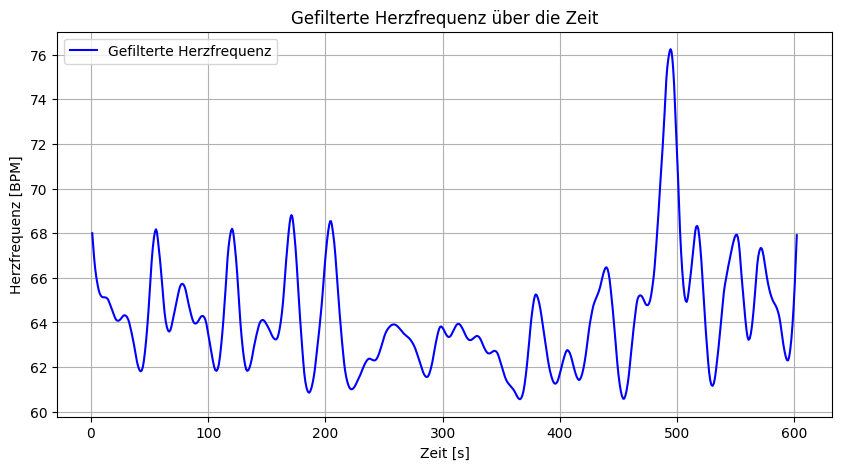

In [13]:
# EKG-Daten einlesen und filtern
def process_ecg_data(filename, fs, lowcut, highcut, order=4):
    
    # Laden der EKG-Daten aus der angegebenen Datei
    data = pd.read_csv(filename, delimiter=';', header=None)
    data.columns = ['signal', 'zeit']

    # Konvertieren der Spalten in numerische Werte und Entfernen ungültiger Einträge
    data = data.apply(pd.to_numeric, errors='coerce')
    data.dropna(inplace=True)

    # Extrahieren der Signal- und Zeitspalten, Konvertierung der Zeit von Millisekunden in Sekunden
    ecg_signal = data['signal'].values
    time = data['zeit'].values / 1000

    # Anwenden eines Tiefpassfilters, um hochfrequentes Rauschen zu entfernen
    wn = 50 / (0.5 * fs)  # Normierung der Grenzfrequenz
    b, a = scipy.signal.butter(order, wn, 'low', analog=False)
    ecg_lowpass = scipy.signal.filtfilt(b, a, ecg_signal)

    # Anwenden eines Bandpassfilters, um den gewünschten Frequenzbereich zu isolieren
    ecg_filtered = bandpass_filter(ecg_lowpass, fs, lowcut, highcut, order)

    return time, ecg_signal, ecg_filtered 


# Funktion zum Anwenden eines Bandpassfilters
def bandpass_filter(data, fs, lowcut, highcut, order=4):
    # Definition der normierten Grenzfrequenzen
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist

    # Entwurf und Anwendung des Filters
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    return scipy.signal.filtfilt(b, a, data)

# Berechnung der Peaks und plot der Herzfrequenz

filename = 'Ruhe_EKG_Jule.csv'  
fs = 1000  # Abtastfrequenz (in Hz)
lowcut = 0.5  # Untere Grenzfrequenz für den Bandpassfilter
highcut = 50  # Obere Grenzfrequenz für den Bandpassfilter

# Verarbeitung der EKG-Daten
time, ecg_signal, ecg_filtered = process_ecg_data(filename, fs, lowcut, highcut)

# Ableitung des EKG-Signals berechnen und Peaks finden
d_ecg, peaks_d_ecg = decg_peaks(ecg_filtered, time)

# R-Zacken (R-Wellen) identifizieren
Rwave_peaks_d_ecg = d_ecg_peaks(d_ecg, peaks_d_ecg, time, heightper=0.6, distanceper=0.5)
Rwave_t = Rwave_peaks(ecg_filtered, d_ecg, Rwave_peaks_d_ecg, time)

# RR-Intervalle und Herzfrequenz (in BPM) berechnen
rr_intervals = np.diff(Rwave_t)
heartrate = 60 / rr_intervals  # Umrechnung der RR-Intervalle in Herzfrequenz (BPM)

# Glätten der Herzfrequenz
wn = 0.1  # Normierte Grenzfrequenz für den Filter
b2, a2 = scipy.signal.butter(4, wn, btype='low')  # Tiefpassfilter (Butterworth)
heartrate_filtered = scipy.signal.filtfilt(b2, a2, heartrate)  # Filter anwenden

# Zeitachse für die Herzfrequenz basierend auf den RR-Intervallen berechnen
hr_time = (Rwave_t[:-1] + Rwave_t[1:]) / 2  # Mittelpunkte der RR-Intervalle

# Herzfrequenz über die Zeit plotten
plt.figure(figsize=(10, 5))
plt.plot(hr_time, heartrate_filtered, color='b', label='Gefilterte Herzfrequenz')
plt.xlabel('Zeit [s]')  # Beschriftung der x-Achse
plt.ylabel('Herzfrequenz [BPM]')  # Beschriftung der y-Achse
plt.title('Gefilterte Herzfrequenz über die Zeit')  # Titel des Plots
plt.grid(True)  # Gitterlinien für bessere Lesbarkeit
plt.legend()  # Legende anzeigen
plt.show()  # Plot anzeigen


## Aufgabe 9
Fokussieren Sie ich nun auf 5a).i) des Experimets, also dem Ruhen auf dem Ergometer

(a) Plot der gefilterten Herzfrequenz gegen die Zeit während der ersten 3 Minuten. Markierung wann das Treten anfängt

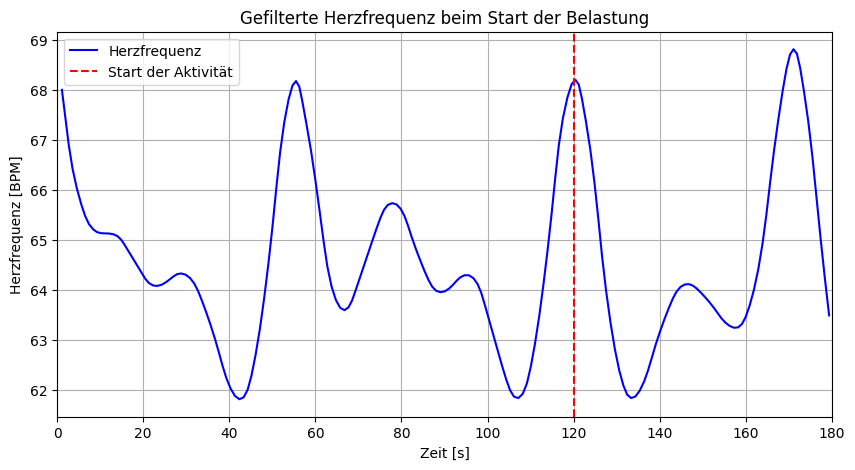

In [14]:
# Plot der Herzfrequenz für die ersten drei Minuten
#plt.figure(figsize=(10, 5))

# Herzfrequenz filtern und nur die ersten drei Minuten auswählen
mask_3min = hr_time <= 180  # Maske für die ersten 3 Minuten (Zeit ≤ 180 Sekunden)
hr_time_3min = hr_time[mask_3min]
heartrate_filtered_3min = heartrate_filtered[mask_3min]

plt.figure(figsize=(10, 5))

plt.plot(hr_time_3min, heartrate_filtered_3min, color='b', label='Herzfrequenz')

# Hinzufügen einer senkrechten Linie bei 120 Sekunden (2 Minuten)
plt.axvline(x=120, color='r', linestyle='--', label='Start der Aktivität')

# Beschriftung der Achsen und Titel
plt.xlabel('Zeit [s]')
plt.ylabel('Herzfrequenz [BPM]')
plt.xlim(0, 180) 
plt.title('Gefilterte Herzfrequenz beim Start der Belastung')
plt.grid(True)
plt.legend()  # Legende anzeigen
plt.show()  # Plot anzeigen


Eigentlich sollte die Belastung bei 2 mins anfangen, weil sie dort anfängt zu treten - aber das ist hier nicht der Fall


(b) Beschreiben Sie die Dynamik des Anstiegs der Herzfrequenz. Warum sind Start der Übung und Anstieg der Herzfrequenz nicht zum selben Zetpunkt?

### Dynamik des Anstiegs der Herzfrequenz:
Der Anstieg der Herzfrequenz während des Belastungstests zeigt typischerweise eine Verzögerung zwischen dem Start der Übung und dem eigentlichen Anstieg der Herzfrequenz. Dies ist auf die Reaktionszeit des kardiovaskulären Systems zurückzuführen. 

Zu Beginn der Übung benötigt der Körper mehr Sauerstoff und Energie, wodurch das autonome Nervensystem (vor allem der Sympathikus) aktiviert wird. Diese Aktivierung führt zu einer gesteigerten Herzfrequenz, um:
1. Mehr sauerstoffreiches Blut zu den Muskeln zu transportieren.
2. Den erhöhten Stoffwechselbedarf zu decken.

Die Dynamik zeigt sich in drei Phasen:
1. **Initiale Verzögerung**: 
   - Kurz nach dem Start bleibt die Herzfrequenz nahezu unverändert.
   - Dies liegt daran, dass der Körper die Belastung zunächst registrieren und entsprechende Steuermechanismen aktivieren muss.
   
2. **Schneller Anstieg**: 
   - Sobald die Belastung erfasst wurde, steigt die Herzfrequenz rasch an, da das Herz durch den Sympathikus stimuliert wird und die Durchblutung der arbeitenden Muskulatur priorisiert wird.

3. **Plateauphase**:
   - Nach dem initialen Anstieg erreicht die Herzfrequenz eine stabile Phase, die sich an der Intensität der Übung orientiert.

---

### Grund für die Verzögerung zwischen Start der Übung und Herzfrequenzanstieg:
Die Verzögerung wird durch die Zeit benötigt, um die physiologischen Anpassungen an die Belastung einzuleiten:
1. **Sensorische Wahrnehmung**:
   - Mechanorezeptoren in den Muskeln und Gelenken melden die Bewegung an das zentrale Nervensystem (ZNS).
   - Das ZNS aktiviert daraufhin den Sympathikus, der das Herz stimuliert.

2. **Kardiovaskuläre Anpassung**:
   - Der Sympathikus erhöht die Herzfrequenz nicht sofort; dies geschieht schrittweise.
   - Gleichzeitig wird der Parasympathikus (der die Herzfrequenz senkt) gehemmt.

3. **Metabolische Anpassung**:
   - Muskeln benötigen zunächst Sauerstoff aus lokalen Reserven, bevor das Herz-Kreislauf-System die Blutversorgung erhöht.
   - Diese Prozesse benötigen einige Sekunden, weshalb die Herzfrequenz nicht direkt mit dem Start der Übung ansteigt.

---

### Zusammenfassung:
Der Anstieg der Herzfrequenz nach Beginn der Übung erfolgt mit einer kurzen Verzögerung. Dies liegt daran, dass das kardiovaskuläre System Zeit benötigt, um die Belastung wahrzunehmen und physiologische Anpassungen einzuleiten. Die Dynamik des Anstiegs spiegelt die Aktivierung des Sympathikus und die metabolischen Anforderungen der arbeitenden Muskeln wider.

(c) Beschreiben Sie kurz, was unter dem Begriff Cardiac Output verstanden wird (2-4 Sätze). Warum bewirkt eine Plötzliche Aktivierung der Muskulatur keine direkte Änderung des Cardiac Putputs

Der **Cardiac Output** (Herzzeitvolumen) ist das Blutvolumen, das das Herz pro Minute in den Kreislauf pumpt, und ergibt sich aus Herzfrequenz und Schlagvolumen. Nach Beginn einer Übung zeigt die Herzfrequenz eine kurze Verzögerung, da das kardiovaskuläre System Zeit benötigt, um die Belastung zu registrieren und zu reagieren. Mechanorezeptoren in den Muskeln aktivieren den Sympathikus, der die Herzfrequenz und das Schlagvolumen erhöht, während der Parasympathikus gehemmt wird. Eine plötzliche Aktivierung der Muskulatur führt jedoch nicht sofort zu einer Änderung des Cardiac Outputs, da die Muskeln zunächst lokale Sauerstoffreserven und anaerobe Stoffwechselprozesse nutzen. Erst wenn diese Reserven erschöpft sind, passt sich das Herz-Kreislauf-System an, indem es die Blutversorgung erhöht. Diese Anpassungen benötigen einige Sekunden, weshalb der Cardiac Output nicht unmittelbar auf die Aktivierung der Muskulatur reagiert.

## Aufgabe 10
Betrachten Sie nun den Zeitabschnitt, in dem der Proband mit der Aktivität stoppt und die folgenden drei Minuten nach dem Stoppen, während der Proband seinen Puls erholen lässt.

a. Plotten Sie die gefilterte Herzfrequenz gegen die Zeit (4 Minuten) und markieren Sie den Plot an der Stelle, bei dem die Aktivität aufgehört hat.

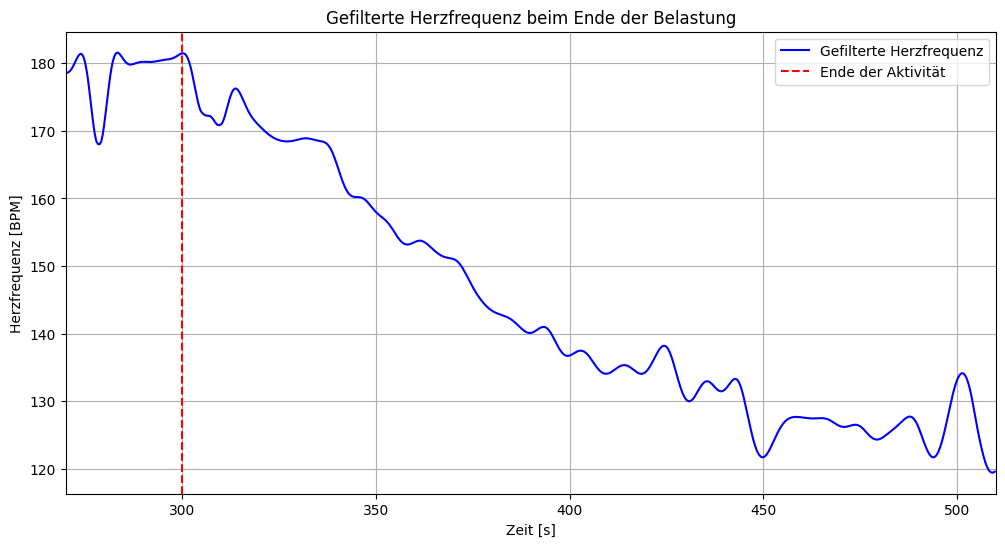

In [15]:
# EKG-Daten einlesen und filtern
def process_ecg_data(filename, fs, lowcut, highcut, order=4):
    
    # Laden der EKG-Daten aus der angegebenen Datei
    data = pd.read_csv(filename, delimiter=';', header=None)
    data.columns = ['signal', 'zeit']

    # Konvertieren der Spalten in numerische Werte und Entfernen ungültiger Einträge
    data = data.apply(pd.to_numeric, errors='coerce')
    data.dropna(inplace=True)

    # Extrahieren der Signal- und Zeitspalten, Konvertierung der Zeit von Millisekunden in Sekunden
    ecg_signal = data['signal'].values
    time = data['zeit'].values / 1000

    # Anwenden eines Tiefpassfilters, um hochfrequentes Rauschen zu entfernen
    wn = 50 / (0.5 * fs)  # Normierung der Grenzfrequenz
    b, a = scipy.signal.butter(order, wn, 'low', analog=False)
    ecg_lowpass = scipy.signal.filtfilt(b, a, ecg_signal)

    # Anwenden eines Bandpassfilters, um den gewünschten Frequenzbereich zu isolieren
    ecg_filtered = bandpass_filter(ecg_lowpass, fs, lowcut, highcut, order)

    return time, ecg_signal, ecg_filtered 

# Funktion zum Anwenden eines Bandpassfilters
def bandpass_filter(data, fs, lowcut, highcut, order=4):
    # Definition der normierten Grenzfrequenzen
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist

    # Entwurf und Anwendung des Filters
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    return scipy.signal.filtfilt(b, a, data)

# Berechnung der Peaks und plot der Herzfrequenz

filename = 'belastung_Anna.csv'  
fs = 1000  # Abtastfrequenz (in Hz)
lowcut = 0.5  # Untere Grenzfrequenz für den Bandpassfilter
highcut = 50  # Obere Grenzfrequenz für den Bandpassfilter

# Verarbeitung der EKG-Daten
time, ecg_signal, ecg_filtered = process_ecg_data(filename, fs, lowcut, highcut)

# Ableitung des EKG-Signals berechnen und Peaks finden
d_ecg, peaks_d_ecg = decg_peaks(ecg_filtered, time)

# R-Zacken (R-Wellen) identifizieren
Rwave_peaks_d_ecg = d_ecg_peaks(d_ecg, peaks_d_ecg, time, heightper=0.6, distanceper=0.5)
Rwave_t = Rwave_peaks(ecg_filtered, d_ecg, Rwave_peaks_d_ecg, time)

# RR-Intervalle und Herzfrequenz (in BPM) berechnen
rr_intervals = np.diff(Rwave_t)
heartrate = 60 / rr_intervals  # Umrechnung der RR-Intervalle in Herzfrequenz (BPM)

# Glätten der Herzfrequenz
wn = 0.1  # Normierte Grenzfrequenz für den Filter
b2, a2 = scipy.signal.butter(4, wn, btype='low')  # Tiefpassfilter (Butterworth)
heartrate_filtered = scipy.signal.filtfilt(b2, a2, heartrate)  # Filter anwenden

# Zeitachse für die Herzfrequenz basierend auf den RR-Intervallen berechnen
hr_time = (Rwave_t[:-1] + Rwave_t[1:]) / 2  # Mittelpunkte der RR-Intervalle


# Berechnung des Zeitbereichs für die Herzfrequenz von Minute 4 bis Minute 8
start_time = 4.5 * 60  # Startzeitpunkt (4 Minuten in Sekunden)
end_time = 8.5 * 60  # Endzeitpunkt (8 Minuten in Sekunden)

# Auswahl der relevanten Daten im Zeitintervall
time_mask = (hr_time >= start_time) & (hr_time <= end_time)
hr_time_segment = hr_time[time_mask]
heartrate_segment = heartrate_filtered[time_mask]

# Plot der gefilterten Herzfrequenz für den Zeitbereich
plt.figure(figsize=(12, 6))
plt.plot(hr_time_segment, heartrate_segment, color='b', label='Gefilterte Herzfrequenz')
plt.axvline(x=5 * 60, color='r', linestyle='--', label='Ende der Aktivität')  # Markierung bei Minute 5
plt.xlabel('Zeit [s]')
plt.ylabel('Herzfrequenz [BPM]')
plt.xlim(270,510)
plt.title('Gefilterte Herzfrequenz beim Ende der Belastung')
plt.grid(True)
plt.legend()
plt.show()

b. Kommt die Herzfrequenz zum ursprüngliche Ruhepuls zurück? Wenn ja, wie lange hat dies gedauert und warum dauert dieser Prozess so lange?

#### Kommt die Herzfrequenz zum ursprünglichen Ruhepuls zurück?

Nein, die Herzfrequenz kehrt während der 5-minütigen Erholungsphase nicht vollständig zum ursprünglichen Ruhepuls (ca. 90–100 BPM) zurück.
Gegen Ende der Erholungszeit liegt die Herzfrequenz bei etwa 120 BPM, was immer noch deutlich über dem Ruhepuls liegt.

#### Warum dauert dieser Prozess so lange?

Die verzögerte Rückkehr der Herzfrequenz zum Ruhepuls ist auf mehrere physiologische Faktoren zurückzuführen:

Kardiovaskuläre Anpassung nach Belastung:

Während körperlicher Aktivität steigt die Herzfrequenz, um die erhöhte Sauerstoff- und Nährstoffversorgung der Muskulatur zu gewährleisten. Nach der Belastung benötigt der Körper Zeit, um den erhöhten Sauerstoffbedarf (Sauerstoffschuld) auszugleichen.

Restaurierung von Energiespeichern:

Nach der Belastung muss der Körper Glykogenreserven auffüllen, Laktat abbauen und die normale Zellfunktion wiederherstellen. Diese Prozesse erfordern Energie und können die Herzfrequenz erhöht halten.

Regulation des autonomen Nervensystems:

Während der Belastung ist das sympathische Nervensystem (Stressreaktion) aktiv. Die Rückkehr zu einem dominanten parasympathischen Zustand (Ruhezustand) erfolgt nicht sofort, sondern allmählich.

Körpertemperatur und Stoffwechsel: 

Nach der Belastung bleibt der Stoffwechsel erhöht, um Wärme abzuführen und Reparaturprozesse einzuleiten, was die Herzfrequenz länger hochhält.

c. Denken Sie, dass die Zeit bis zur Erholung der Herzfrequenz bei Athleten kürzer ist, als bei untrainierten Personen? Warum? 

#### Erholung bei Athleten vs. Untrainierte:

Ja, es wird allgemein angenommen, dass die Zeit zur Erholung der Herzfrequenz bei Athleten kürzer ist als bei untrainierten Personen. Das hat mehrere Gründe:

#### Gründe für schnellere Erholung bei Athleten:

Bessere kardiovaskuläre Fitness: Athleten haben ein stärkeres Herz-Kreislaufsystem. Ihr Herz ist in der Lage, mehr Blut pro Schlag zu pumpen, wodurch der Körper effizienter mit Sauerstoff versorgt wird. Dies bedeutet, dass der Körper schneller in den Ruhemodus zurückkehrt, da weniger Zeit benötigt wird, um Sauerstoff zu liefern und Abfallprodukte zu verarbeiten.

Erhöhte parasympathische Aktivität: Bei trainierten Personen ist das autonome Nervensystem besser ausbalanciert, wobei der parasympathische Anteil (der für die Erholung verantwortlich ist) stärker ausgeprägt ist. Dies ermöglicht eine schnellere Rückkehr des Herzens in den Ruhezustand.

Schnellere Entfernung von Abfallprodukten: Athleten haben eine höhere Fähigkeit, Stoffwechselprodukte wie Laktat schneller aus dem Körper zu entfernen, was zu einer schnelleren Erholung führt.

#### Gründe für langsame Erholung bei Untrainierten:

Bei untrainierten Personen kann die Erholung länger dauern, da ihr Kreislaufsystem weniger effizient ist. Das Herz muss härter arbeiten, um den Körper mit ausreichend Sauerstoff zu versorgen, und die Fähigkeit, Abfallprodukte schnell zu entfernen, ist eingeschränkt.

Die Regulation des autonomen Nervensystems (insbesondere des parasympathischen Systems) ist bei untrainierten Personen weniger gut entwickelt, was zu einer langsameren Senkung der Herzfrequenz führt.

## Aufgabe 11
Lesen Sie das Paper" Use of Heart rate to predict Energy expanditure from low to high acitivity levels" durch und erkläre, wie die autoren die Verbindung zwischen Herzfrequenz und Enerieverbrauch entwickelt haben. beantworte folgende fragen: Was ist der Unterschied zwischen den drei beschiebenen Gleichungen? Welche der Gleichungen würden  Sie für die Berechnung ihres Energieverbrauchs in diesm Experiment verwenden? Begründen Sie ihre auswahl. Schreibe mir 2 Paragraphen

- Die Autoren zeigen, dass der Energieverbrauch (EE) über die Herzfrequenz (HF) geschätzt werden kann, da diese linear mit der Sauerstoffaufnahme (VO₂) zusammenhängt. Da der Körper Sauerstoff zur Energiegewinnung nutzt, ermöglicht die Messung der HF eine indirekte Berechnung des Energieverbrauchs. Sie entwickelten Gleichungen basierend auf Experimenten, in denen HF und VO₂ bei unterschiedlichen Aktivitätsniveaus gemessen wurden.


- Die drei beschriebenen Gleichungen zur Schätzung des Energieverbrauchs unterscheiden sich in ihrer Genauigkeit und Anwendung:

1. **Allgemeine Gleichung**: Sie basiert auf einer durchschnittlichen Beziehung zwischen Herzfrequenz (HF) und Sauerstoffaufnahme (VO₂) für die gesamte Population. Diese Gleichung ist weniger präzise, da sie individuelle Unterschiede nicht berücksichtigt.

2. **Individuelle Gleichung**: Sie verwendet die spezifischen Daten jedes Individuums, um die Beziehung zwischen HF und VO₂ zu bestimmen. Dadurch wird der Energieverbrauch genauer geschätzt, da individuelle physiologische Unterschiede berücksichtigt werden.

3. **Herzfrequenz-Reserve (HRR)-basierte Gleichung**: Diese Gleichung nutzt die Differenz zwischen maximaler und Ruhe-HF, um den Energieverbrauch zu berechnen. Sie berücksichtigt individuelle Parameter, ist jedoch weniger direkt mit der VO₂-Messung verknüpft als die individuelle Gleichung.

**Der Hauptunterschied liegt also in der Berücksichtigung individueller Unterschiede und der Genauigkeit der Schätzungen.**
- Für die Berechnung unseres Energieverbrauchs würden wir die individuelle Gleichung nehmen, da sie die spezifische HF-VO₂-Beziehung jedes Teilnehmers berücksichtigt und somit liefert sie genauere Ergebnisse als die allgemeine Gleichung, die auf Durchschnittswerten basiert

## Aufgabe 12
Berechnen des metabolischen Energieverbrauchs über die Zeit mit der individuellen Gleichung 

In [16]:
# CSV-Datei laden
file_path = 'Belastungs_EKG_Sara.csv'
data = pd.read_csv(file_path, delimiter=';')

# Spalten umbenennen
data.columns = ['Herzfrequenz', 'Zeit_ms']

# Parameter
a = 0.065  # kcal/min pro Herzfrequenzeinheit
b = 1.0    # Grundumsatz in kcal/min

# Zeit in Minuten umrechnen
data['Zeit_min'] = data['Zeit_ms'] / (1000 * 60)

# Metabolischen Energieverbrauch berechnen mit der individuellen Formel
data['Energieverbrauch_kcal'] = a * data['Herzfrequenz'] + b

# Daten ab Minute 5 filtern
filtered_data_5_to_end = data[data['Zeit_min'] >= 5]

# Sortieren nach Zeit (falls nicht bereits sortiert)
filtered_data_5_to_end = filtered_data_5_to_end.sort_values(by='Zeit_ms')

# Zeitdifferenzen in Minuten berechnen
filtered_data_5_to_end['Zeit_diff_min'] = filtered_data_5_to_end['Zeit_ms'].diff() / (1000 * 60)

# Energieverbrauch pro Zeitintervall berechnen
filtered_data_5_to_end['Energieverbrauch_interval_kcal'] = (
    filtered_data_5_to_end['Energieverbrauch_kcal'] * filtered_data_5_to_end['Zeit_diff_min']
)

# Gesamten kumulierten Energieverbrauch berechnen
total_cumulative_energy_expenditure_5_to_end = filtered_data_5_to_end['Energieverbrauch_interval_kcal'].sum()

# Ergebnis ausgeben
print(f"Kumulativer metabolischer Energieverbrauch ab Minute 5: {total_cumulative_energy_expenditure_5_to_end:.2f} kcal")


Kumulativer metabolischer Energieverbrauch ab Minute 5: 99.81 kcal


In [17]:
# CSV-Datei laden
file_path = 'Belastungs_EKG_Sara.csv'
data = pd.read_csv(file_path, delimiter=';')

# Spalten umbenennen
data.columns = ['Herzfrequenz', 'Zeit_ms']

# Parameter
a = 0.065  # kcal/min pro Herzfrequenzeinheit
b = 1.0    # Grundumsatz in kcal/min

# Zeit in Minuten umrechnen
data['Zeit_min'] = data['Zeit_ms'] / (1000 * 60)

# Metabolischen Energieverbrauch berechnen
data['Energieverbrauch_kcal'] = a * data['Herzfrequenz'] + b

# Sortieren nach Zeit (falls nicht bereits sortiert)
data_sorted = data.sort_values(by='Zeit_ms')

# Zeitdifferenzen in Minuten berechnen
data_sorted['Zeit_diff_min'] = data_sorted['Zeit_ms'].diff() / (1000 * 60)

# Energieverbrauch pro Zeitintervall berechnen
data_sorted['Energieverbrauch_interval_kcal'] = (
    data_sorted['Energieverbrauch_kcal'] * data_sorted['Zeit_diff_min']
)

# Gesamten kumulierten Energieverbrauch berechnen
total_cumulative_energy_expenditure_entire = data_sorted['Energieverbrauch_interval_kcal'].sum()

# Ergebnis ausgeben
print(f"Kumulativer metabolischer Energieverbrauch über den gesamten Zeitraum: {total_cumulative_energy_expenditure_entire:.2f} kcal")


Kumulativer metabolischer Energieverbrauch über den gesamten Zeitraum: 201.95 kcal


## Aufgabe 13
Berechnen Sie den gesamten Energieverbrauch für das Experiment. Drücken Sie das Ergebnis von Joule, Kalorien, Rittersport Tafeln, Bier und als Anteil des Kalorienbedarfs für die Person

In [18]:
# Gegebene Werte
alter = 21  # Alter in Jahren
gewicht = 70  # Gewicht in kg
größe = 170  # Größe in cm
aktivitätslevel = 1.8  # Sportlich -> aktives Level
geschlecht = 'weiblich'  # 'männlich' oder 'weiblich'

# Experiment Energieverbrauch (bereits berechnet in kcal)
energieverbrauch_kcal = 201.95

# Umrechnungen
energieverbrauch_joule = energieverbrauch_kcal * 4184  # kcal -> Joule
energieverbrauch_cal = energieverbrauch_kcal * 1000   # kcal -> Kalorien
energieverbrauch_rittersport = energieverbrauch_kcal / 550  # kcal -> Rittersport Tafeln
energieverbrauch_bier = energieverbrauch_kcal / 215  # kcal -> Bierflaschen

# Grundumsatzberechnung (Harris-Benedict-Formel)
if geschlecht == 'männlich':
    grundumsatz = 66.5 + (13.75 * gewicht) + (5.003 * größe) - (6.75 * alter)
elif geschlecht == 'weiblich':
    grundumsatz = 655.1 + (9.563 * gewicht) + (1.850 * größe) - (4.676 * alter)
else:
    raise ValueError("Geschlecht muss 'männlich' oder 'weiblich' sein")

# Gesamtbedarf
kalorienbedarf = grundumsatz * aktivitätslevel

# Anteil des Energieverbrauchs am Kalorienbedarf
anteil_am_kalorienbedarf = (energieverbrauch_kcal / kalorienbedarf) * 100

# Ergebnisse ausgeben
print(f"Energieverbrauch (Experiment): {energieverbrauch_kcal:.2f} kcal")
print(f"In Joule: {energieverbrauch_joule:.2f} J")
print(f"In Kalorien: {energieverbrauch_cal:.2f} Kalorien")
print(f"In Rittersport-Tafeln: {energieverbrauch_rittersport:.2f} Tafeln")
print(f"In Bier: {energieverbrauch_bier:.2f} Flaschen (0,5 l)")
print(f"Täglicher Kalorienbedarf: {kalorienbedarf:.2f} kcal")
print(f"Anteil des Energieverbrauchs am Kalorienbedarf: {anteil_am_kalorienbedarf:.2f} %")


Energieverbrauch (Experiment): 201.95 kcal
In Joule: 844958.80 J
In Kalorien: 201950.00 Kalorien
In Rittersport-Tafeln: 0.37 Tafeln
In Bier: 0.94 Flaschen (0,5 l)
Täglicher Kalorienbedarf: 2773.47 kcal
Anteil des Energieverbrauchs am Kalorienbedarf: 7.28 %
